In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
import math

# esthetic definitions for the plots
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]
path_to_data = "/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data"
path_to_output = "/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/output"
dfroot = path_to_data+"/actpolfull_dr4.01/data/data_act/"

import bplike as bp

# Plot spectra

In [3]:
flux  = '15mJy'

lkl = 'act_planck'



if lkl == 'act_only':
    data_root = path_to_data + '/act_planck_data_210328/'  
    sp = bp.StevePower_extended(data_root,flux)
else:
    data_root = dfroot 
    sp = bp.StevePower(data_root,flux)



label_bps = []
for b1,b2 in zip(sp.fband1,sp.fband2):
    label_bps.append(b1 +'x' +b2)
np.shape(label_bps)
print('bands label:',label_bps)
print('multipol bins per spectrum:',sp.n_bins)

bands label: ['090x090', '090x100', '090x143', '090x150', '090x217', '090x353', '090x545', '100x100', '100x143', '143x143', '100x150', '143x150', '150x150', '150x217', '150x353', '150x545', '100x217', '143x217', '217x217', '100x353', '143x353', '217x353', '353x353', '100x545', '143x545', '217x545', '353x545', '545x545']
multipol bins per spectrum: 48


90.0

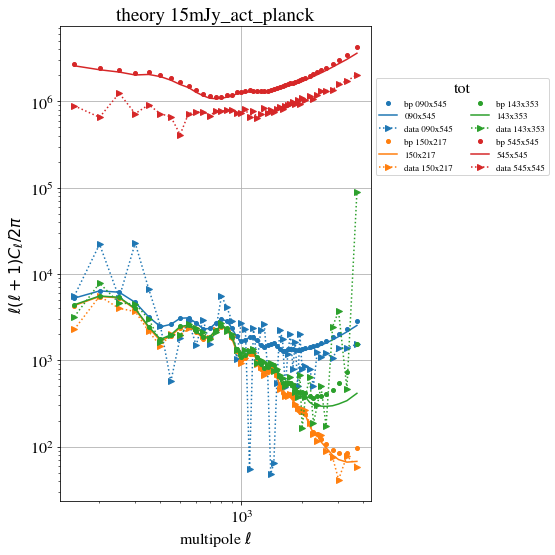

In [73]:
#['tsz','ksz','cibc','cibp','tsz_x_cib','radio','galdust','galsyn']
comp = 'tot'
# ps_list = ['T095xT095', 'T095xT150', 'T150xT150', 'T095xE095', 'T095xE150', 'T150xE095', 'T150xE150', 'E095xE095', 'E095xE150', 'E150xE150']
ps_list = ['090x090', '090x100', '090x143', '090x150', '090x217', '090x353', '090x545', '100x100', '100x143', '143x143', '100x150', '143x150', '150x150', '150x217', '150x353', '150x545', '100x217', '143x217', '217x217', '100x353', '143x353', '217x353', '353x353', '100x545', '143x545', '217x545', '353x545', '545x545']

# ps_list = ['353x353']


bps = '_bp_'
ls = np.load(path_to_output+'/ls_theory_'+flux+bps+lkl+'.npy')

dls_bp = np.load(path_to_output+'/dls_theory_'+comp+'_'+flux+bps+lkl+'.npy')
bps = '_'
dls = np.load(path_to_output+'/dls_theory_'+comp+'_'+flux+bps+lkl+'.npy')


plt.subplots(figsize=(8, 8))
for ps in ps_list:
    if ps not in label_bps:
        print('error ps not in label_bps')
        break
    else:
        j = label_bps.index(ps)
        if (j+1)%7 != 0:
            continue    
        line,= plt.plot(ls[j*sp.n_bins:(j+1)*sp.n_bins],
                 np.abs(dls_bp[j*sp.n_bins:(j+1)*sp.n_bins]),
                 label='bp '+label_bps[j],
                 marker='o',
                 ls = 'None',
                 markersize = 4)
        
        plt.plot(ls[j*sp.n_bins:(j+1)*sp.n_bins],
                 np.abs(dls[j*sp.n_bins:(j+1)*sp.n_bins]),
                 label=label_bps[j],
                 color = line.get_color(),
                 marker='None',
                 ls = '-')
        
        ells = sp.ls[j*n_bins:(j+1)*n_bins]
        fac = ells*(ells+1)/2/np.pi
        plt.plot(sp.ls[j*n_bins:(j+1)*n_bins],fac*np.abs(sp.spec[j*n_bins:(j+1)*n_bins]),
                 color = line.get_color(),
                 ls = ':',
                 marker = '>',
                 label = 'data '+label_bps[j])


        #ratio
#         freq1 = float(label_bps[j].split('x')[0])
#         freq2 = float(label_bps[j].split('x')[1])
#         line,= plt.plot(ls[j*sp.n_bins:(j+1)*sp.n_bins],
#                  np.abs(dls_bp[j*sp.n_bins:(j+1)*sp.n_bins]/dls[j*sp.n_bins:(j+1)*sp.n_bins]),#/freq1/freq2,
#                  label='bp '+label_bps[j],
#                  #marker='o',
#                  ls = '-',
#                  markersize = 4)

plt.xlabel(r'multipole $\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell/2\pi$')
plt.loglog()
plt.legend(ncol = 2 ,fontsize = 9,bbox_to_anchor=(1., 0.9),title=comp)
plt.title('theory '+ flux+bps+'act_planck')
plt.grid()
# plt.ylim(1e1,1e7)
plt.tight_layout()
plt.savefig('/Users/boris/Work/CLASS-SZ/SO-SZ/figures/'+flux+bps+lkl+'_'+comp+'.pdf')


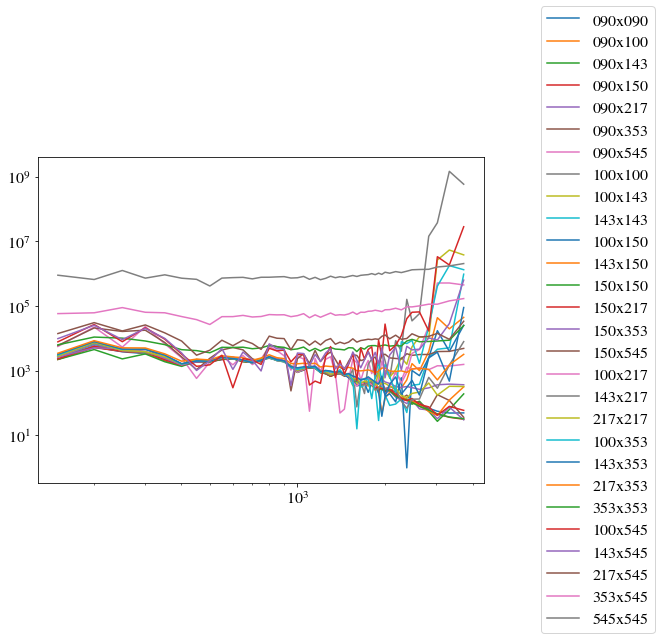

In [55]:
n_bins = 48
j = 0
for i in range(len(sp.spec)):
    if i%n_bins == 0:
        j+=1
        ells = sp.ls[(j-1)*n_bins:j*n_bins]
        fac = ells*(ells+1)/2/np.pi
        plt.plot(sp.ls[(j-1)*n_bins:j*n_bins],fac*np.abs(sp.spec[(j-1)*n_bins:j*n_bins]),label = label_bps[j-1])

plt.loglog()
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5))
# plt.savefig('dls_data_d56.pdf')

## save coadd data

In [190]:
flux = '15mJy'
if flux == '15mJy':
    rfroot = 'deep56'
if flux == '100mJy':
    rfroot = 'boss'

    
data_root = path_to_data + '/act_planck_data_210328/'    

# load coadd data
spec = np.load(data_root+f'{rfroot}_all_ps_mean_C_ell_data_210327.npy')
cov = np.load(data_root+f'{rfroot}_all_ps_Cov_from_coadd_ps_210327.npy')
bbl = np.load(data_root+f'{rfroot}_bpwf_210327.npy')

In [191]:
np.shape(cov)

(1344, 1344)

In [96]:
specs = ['f090xf090','f090xf100','f090xf143','f090xf150',
 'f090xf217','f090xf353','f090xf545','f100xf100',
 'f100xf143','f143xf143','f100xf150','f143xf150',
 'f150xf150','f150xf217','f150xf353','f150xf545',
 'f100xf217','f143xf217','f217xf217','f100xf353',
 'f143xf353','f217xf353','f353xf353','f100xf545',
 'f143xf545','f217xf545','f353xf545','f545xf545']

freqs_asked = []
fband1 = []
fband2 = []
for specx in specs:
    comp1 = specx.split('x')[0]
    comp2 = specx.split('x')[1]
    comp1 = comp1.replace('f', '')
    comp2 = comp2.replace('f', '')
    fband1.append(comp1)
    fband2.append(comp2)
    # print(comp1,comp2)
    if comp1 not in freqs_asked:
        freqs_asked.append(comp1)
    if comp2 not in freqs_asked:
        freqs_asked.append(comp2)
freqs_asked.sort()
import pandas as pd

In [97]:
np.shape(spec)

(1344, 3)

In [187]:
order = np.load(data_root+f'{rfroot}_all_C_ell_data_order_190918.npy')
print('startinf df')
df = pd.DataFrame(order,columns=['t1','t2','region','s1','s2','a1','a2'])#.stack().str.decode('utf-8').unstack()
#df.head()
print(df.to_string())

startinf df
   t1 t2   region   s1   s2        a1        a2
0   T  T  deep56_  s15  s15  pa3_f090  pa3_f090
1   T  T  deep56_  s15  s12  pa3_f090  pa0_f100
2   T  T  deep56_  s15  s12  pa3_f090  pa0_f143
3   T  T  deep56_  s15  s15  pa3_f090  pa1_f150
4   T  T  deep56_  s15  s15  pa3_f090  pa2_f150
5   T  T  deep56_  s15  s15  pa3_f090  pa3_f150
6   T  T  deep56_  s15  s12  pa3_f090  pa0_f217
7   T  T  deep56_  s15  s12  pa3_f090  pa0_f353
8   T  T  deep56_  s15  s12  pa3_f090  pa0_f545
9   T  T  deep56_  s12  s12  pa0_f100  pa0_f100
10  T  T  deep56_  s12  s12  pa0_f100  pa0_f143
11  T  T  deep56_  s12  s12  pa0_f143  pa0_f143
12  T  T  deep56_  s14  s15  pa1_f150  pa3_f090
13  T  T  deep56_  s14  s15  pa2_f150  pa3_f090
14  T  T  deep56_  s14  s12  pa1_f150  pa0_f100
15  T  T  deep56_  s14  s12  pa2_f150  pa0_f100
16  T  T  deep56_  s15  s12  pa1_f150  pa0_f100
17  T  T  deep56_  s15  s12  pa2_f150  pa0_f100
18  T  T  deep56_  s15  s12  pa3_f150  pa0_f100
19  T  T  deep56_  s14  s12 

In [189]:
48*15

720

In [90]:
flux = '100mJy'
dfroot_coadd_w = path_to_data+"/bplike_data/big_coadd_weights/200226/"
if flux=='15mJy':
    regions = ['deep56']
elif flux=='100mJy':
    regions = ['boss'] + [f'advact_window{x}' for x in range(6)]
else:
    raise ValueError
    
print(regions)
region = regions[1]
order = np.load(f"{dfroot_coadd_w}{region}_all_C_ell_data_order_190918.npy")

df = pd.DataFrame(order,columns=['t1','t2','region','s1','s2','a1','a2']).stack().str.decode('utf-8').unstack()
df

['boss', 'advact_window0', 'advact_window1', 'advact_window2', 'advact_window3', 'advact_window4', 'advact_window5']


,t1,t2,region,s1,s2,a1,a2
0,T,T,advact_,s16,s16,pa3_f090,pa3_f090
1,T,T,advact_,s16,s16,pa3_f090,pa2_f150
2,T,T,advact_,s16,s16,pa3_f090,pa3_f150
3,T,T,advact_,s16,s16,pa2_f150,pa2_f150
4,T,T,advact_,s16,s16,pa3_f150,pa2_f150
5,T,T,advact_,s16,s16,pa3_f150,pa3_f150
6,T,E,advact_,s16,s16,pa3_f090,pa3_f090
7,T,E,advact_,s16,s16,pa3_f090,pa2_f150
8,T,E,advact_,s16,s16,pa3_f090,pa3_f150
9,T,E,advact_,s16,s16,pa2_f150,pa3_f090


In [184]:
spec = ['TT','TE','EE']
def rmap(r):
    if r[:6]=='advact': return 'advact'
    else: return r
df = df[(df.t1==spec[0]) & (df.t2==spec[1]) & (df.region==rmap(region)+"_")]


In [185]:
df

,t1,t2,region,s1,s2,a1,a2


In [50]:
df.iterrows()

<generator object DataFrame.iterrows at 0x7fbfa85d0040>

In [55]:
def get_band(array):
    a = array.split("_")[1]
    assert a[0]=='f'
    if a[1:]=='150':
        return '150'
    elif a[1:]=='090':
        return '95'
    else:
        raise ValueError

In [64]:
barrays = []
icovs = []
spec = 'TT'
band1 = '95'
band2 = '150'

nbin = 59
rbin = 7 # remove first 7 bins
for region in regions:
    order = np.load(f"{dfroot_coadd_w}{region}_all_C_ell_data_order_190918.npy")
    print(order)
    df = pd.DataFrame(order,columns=['t1','t2','region','s1','s2','a1','a2']).stack().str.decode('utf-8').unstack()
    print(df)
    df = df[(df.t1==spec[0]) & (df.t2==spec[1]) & (df.region==rmap(region)+"_")]
    arrays = []
    print(df)
    for index, row in df.iterrows():
        b1 = get_band(row.a1)
#         print(b1)
        b2 = get_band(row.a2)
        
        if (b1==band1 and b2==band2) or (b1==band2 and b2==band1):
            print(b1,b2)
            arrays.append((index,rmap(region),row.s1,row.s2,row.a1,row.a2))
            barrays.append((index,rmap(region),row.s1,row.s2,row.a1,row.a2))

    adf = pd.DataFrame(arrays,columns = ['i','r','s1','s2','a1','a2'])
    print('adf',adf)
    ids = adf.i.to_numpy()
    oids = []
    for ind in ids:
        oids = oids + list(range(ind*nbin+rbin,(ind+1)*nbin))
print(oids)
print(len(oids))

[[b'T' b'T' b'deep56_' ... b's15' b'pa3_f090' b'pa3_f090']
 [b'T' b'T' b'deep56_' ... b's15' b'pa3_f090' b'pa1_f150']
 [b'T' b'T' b'deep56_' ... b's15' b'pa3_f090' b'pa2_f150']
 ...
 [b'T' b'B' b'deep56_' ... b's15' b'pa3_f150' b'pa1_f150']
 [b'T' b'B' b'deep56_' ... b's15' b'pa3_f150' b'pa2_f150']
 [b'T' b'B' b'deep56_' ... b's15' b'pa3_f150' b'pa3_f150']]
    t1 t2   region   s1   s2        a1        a2
0    T  T  deep56_  s15  s15  pa3_f090  pa3_f090
1    T  T  deep56_  s15  s15  pa3_f090  pa1_f150
2    T  T  deep56_  s15  s15  pa3_f090  pa2_f150
3    T  T  deep56_  s15  s15  pa3_f090  pa3_f150
4    T  T  deep56_  s14  s15  pa1_f150  pa3_f090
..  .. ..      ...  ...  ...       ...       ...
166  T  B  deep56_  s15  s15  pa2_f150  pa2_f150
167  T  B  deep56_  s15  s15  pa2_f150  pa3_f150
168  T  B  deep56_  s15  s15  pa3_f150  pa1_f150
169  T  B  deep56_  s15  s15  pa3_f150  pa2_f150
170  T  B  deep56_  s15  s15  pa3_f150  pa3_f150

[171 rows x 7 columns]
   t1 t2   region   s1   s2 

In [81]:
Lbp = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/bplike_data/bpass/PA3_avg_passband_90_wErr_trunc.txt')
print(np.shape(Lbp))
#col0: freq in GHz
#col1: 90 GHz response
#col2: 1-sigma error
Lbm90 = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/bplike_data/beams/181220/mr3c_s15_pa3_f090_nohwp_night_beam_tform_jitter_deep56_181220.txt')
print(np.shape(Lbm90))
Lbm150 = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/bplike_data/beams/181220/mr3c_s15_pa3_f150_nohwp_night_beam_tform_jitter_deep56_181220.txt')
print(np.shape(Lbm150))
Lbm100 = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/act_planck_data_210328/HFI_BEAM_F100.txt')
print(np.shape(Lbm100))
Lbm143 = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/act_planck_data_210328/HFI_BEAM_F143.txt')
print(np.shape(Lbm143))
Lbm545 = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/act_planck_data_210328/HFI_BEAM_F545.txt')
print(np.shape(Lbm545))
Lbm353 = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/act_planck_data_210328/HFI_BEAM_F353.txt')
print(np.shape(Lbm353))
Lbm217 = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/act_planck_data_210328/HFI_BEAM_F217.txt')
print(np.shape(Lbm217))



PLBeam = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/act_planck_data_210328/planck_beam_resave_210414.txt')
PLB_ell = PLBeam[:,0]
PLB_100 = PLBeam[:,1]
PLB_143 = PLBeam[:,2]
PLB_217 = PLBeam[:,3]
PLB_353 = PLBeam[:,4]
PLB_545 = PLBeam[:,5]



lmax_100 = PLB_ell[PLB_100>0.1].max()
lmax_143 = PLB_ell[PLB_143>0.1].max()
lmax_217 = PLB_ell[PLB_217>0.1].max()
lmax_353 = PLB_ell[PLB_353>0.1].max()
lmax_545 = PLB_ell[PLB_353>0.1].max()

print(lmax_100,lmax_143,lmax_217,lmax_353,lmax_545)

(118, 3)
(30001, 12)
(30001, 12)
(30001, 2)
(30001, 2)
(30001, 2)
(30001, 2)
(30001, 2)
1806.0 2388.0 3500.0 3575.0 3575.0


In [83]:
48*28

1344

In [82]:
np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/act_planck_data_210328/HFI_BEAM_resave_210414_F100.txt',
           np.c_[PLB_ell,PLB_100])
np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/act_planck_data_210328/HFI_BEAM_resave_210414_F143.txt',
           np.c_[PLB_ell,PLB_143])
np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/act_planck_data_210328/HFI_BEAM_resave_210414_F217.txt',
           np.c_[PLB_ell,PLB_217])
np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/act_planck_data_210328/HFI_BEAM_resave_210414_F353.txt',
           np.c_[PLB_ell,PLB_353])
np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/act_planck_data_210328/HFI_BEAM_resave_210414_F545.txt',
           np.c_[PLB_ell,PLB_545])

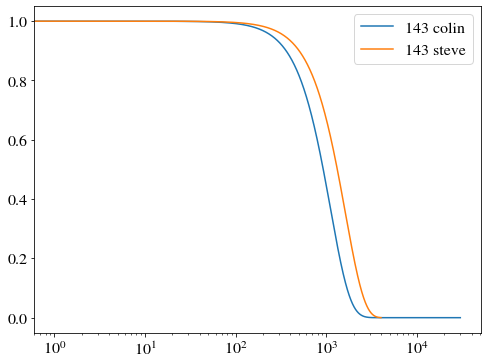

In [75]:
plt.plot(Lbm143[:,0],Lbm143[:,1]/Lbm143[:,1][0],label='143 colin')
plt.plot(PLB_ell,PLB_143,label='143 steve')
plt.legend()
plt.xscale('log')

In [76]:
PLB_ell

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 3.998e+03, 3.999e+03,
       4.000e+03])

Text(0.5, 0, 'multipole $\\ell$')

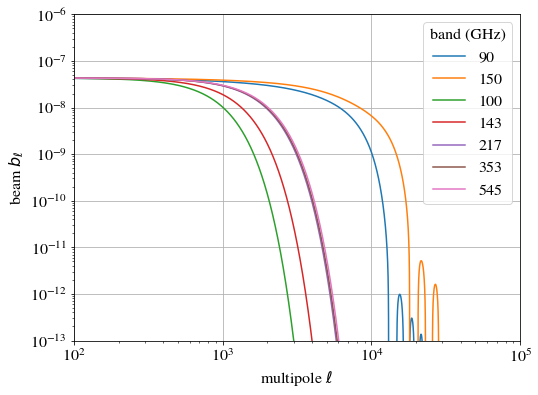

In [65]:
plt.plot(Lbm90[:,0],Lbm90[:,1]/Lbm90[:,1][0]*Lbm150[:,1][0],label='90')
plt.plot(Lbm150[:,0],Lbm150[:,1]/Lbm150[:,1][0]*Lbm150[:,1][0],label='150')
plt.plot(Lbm100[:,0],Lbm100[:,1]/Lbm100[:,1][0]*Lbm150[:,1][0],label='100')
plt.plot(Lbm143[:,0],Lbm143[:,1]/Lbm143[:,1][0]*Lbm150[:,1][0],label='143')
plt.plot(Lbm217[:,0],Lbm217[:,1]/Lbm217[:,1][0]*Lbm150[:,1][0],label='217')
plt.plot(Lbm353[:,0],Lbm353[:,1]/Lbm353[:,1][0]*Lbm150[:,1][0],label='353')
plt.plot(Lbm545[:,0],Lbm545[:,1]/Lbm545[:,1][0]*Lbm150[:,1][0],label='545')

plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-13,1e-6)
plt.xlim(1e2,1e5)
plt.grid()
plt.legend(title='band (GHz)')
plt.ylabel(r'beam $b_\ell$')
plt.xlabel(r'multipole $\ell$')
# plt.savefig('/Users/boris/Work/CLASS-SZ/SO-SZ/figures/beam.pdf')


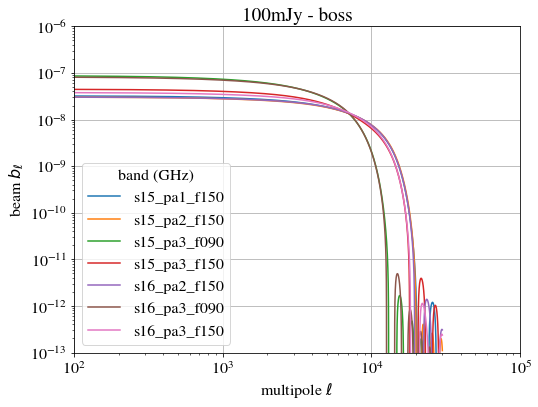

In [213]:

beam_dict =  {'s15_pa1_f150': '/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/bplike_data/beams/181220/mr3c_s15_pa1_f150_nohwp_night_beam_tform_jitter_boss_181220.txt', 's15_pa2_f150': '/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/bplike_data/beams/181220/mr3c_s15_pa2_f150_nohwp_night_beam_tform_jitter_boss_181220.txt', 's15_pa3_f090': '/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/bplike_data/beams/181220/mr3c_s15_pa3_f090_nohwp_night_beam_tform_jitter_boss_181220.txt', 's15_pa3_f150': '/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/bplike_data/beams/181220/mr3c_s15_pa3_f150_nohwp_night_beam_tform_jitter_boss_181220.txt', 's16_pa2_f150': '/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/bplike_data/beams/181220/mr3c_s16_pa2_f150_nohwp_night_beam_tform_jitter_cmb_181220.txt', 's16_pa3_f090': '/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/bplike_data/beams/181220/mr3c_s16_pa3_f090_nohwp_night_beam_tform_jitter_cmb_181220.txt', 's16_pa3_f150': '/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/bplike_data/beams/181220/mr3c_s16_pa3_f150_nohwp_night_beam_tform_jitter_cmb_181220.txt'}

for keys in beam_dict.keys():
    bm = np.loadtxt(beam_dict[keys])
    plt.plot(bm[:,0],bm[:,1],label=keys)
plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-13,1e-6)
plt.xlim(1e2,1e5)
plt.grid()
plt.legend(title='band (GHz)')
plt.ylabel(r'beam $b_\ell$')
plt.xlabel(r'multipole $\ell$')
plt.title('100mJy - boss')
plt.savefig('/Users/boris/Work/CLASS-SZ/SO-SZ/figures/beam_100mJy_boss.pdf')



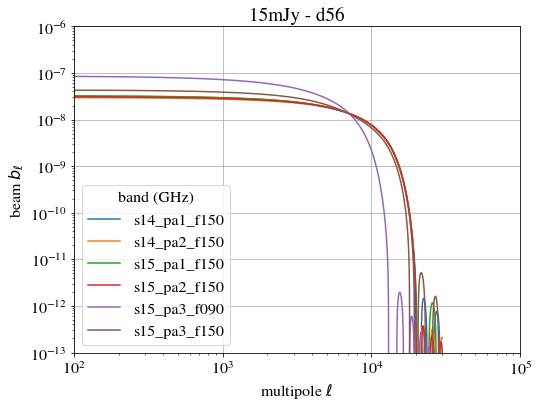

In [214]:

beam_dict =  {'s14_pa1_f150': '/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/bplike_data/beams/181220/mr3c_s14_pa1_f150_nohwp_night_beam_tform_jitter_deep56_181220.txt', 's14_pa2_f150': '/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/bplike_data/beams/181220/mr3c_s14_pa2_f150_nohwp_night_beam_tform_jitter_deep56_181220.txt', 's15_pa1_f150': '/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/bplike_data/beams/181220/mr3c_s15_pa1_f150_nohwp_night_beam_tform_jitter_deep56_181220.txt', 's15_pa2_f150': '/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/bplike_data/beams/181220/mr3c_s15_pa2_f150_nohwp_night_beam_tform_jitter_deep56_181220.txt', 's15_pa3_f090': '/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/bplike_data/beams/181220/mr3c_s15_pa3_f090_nohwp_night_beam_tform_jitter_deep56_181220.txt', 's15_pa3_f150': '/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/bplike_data/beams/181220/mr3c_s15_pa3_f150_nohwp_night_beam_tform_jitter_deep56_181220.txt'}

for keys in beam_dict.keys():
    bm = np.loadtxt(beam_dict[keys])
    plt.plot(bm[:,0],bm[:,1],label=keys)
plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-13,1e-6)
plt.xlim(1e2,1e5)
plt.grid()
plt.legend(title='band (GHz)')
plt.ylabel(r'beam $b_\ell$')
plt.xlabel(r'multipole $\ell$')
plt.title('15mJy - d56')
plt.savefig('/Users/boris/Work/CLASS-SZ/SO-SZ/figures/beam_15mJy_d56.pdf')



key: s15_pa1_f150
key: s15_pa2_f150
key: s15_pa3_f090
key: s15_pa3_f150
key: s16_pa2_f150
key: s16_pa3_f090
key: s16_pa3_f150
key: s12_pa0_f100
integ: 0.9999999999992168
key: s12_pa0_f143
integ: 0.999999999999803
key: s12_pa0_f217
integ: 1.0
key: s12_pa0_f353
integ: 1.0000000000000002
key: s12_pa0_f545
integ: 0.9999999999708964


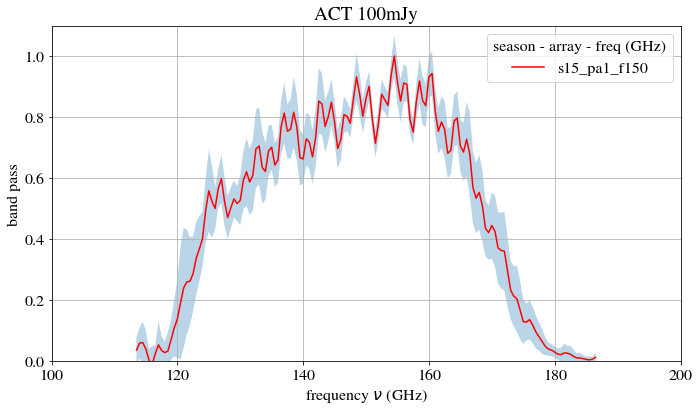

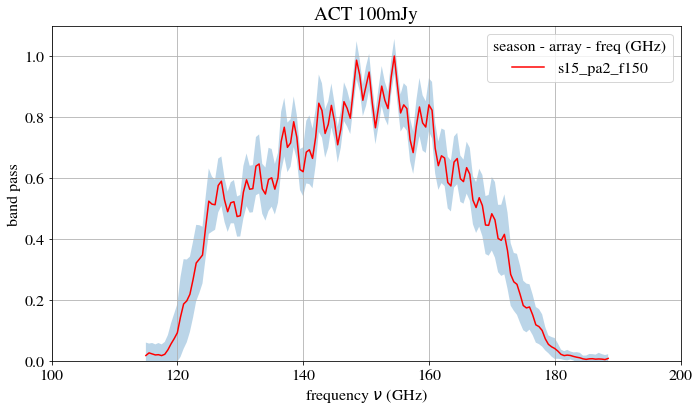

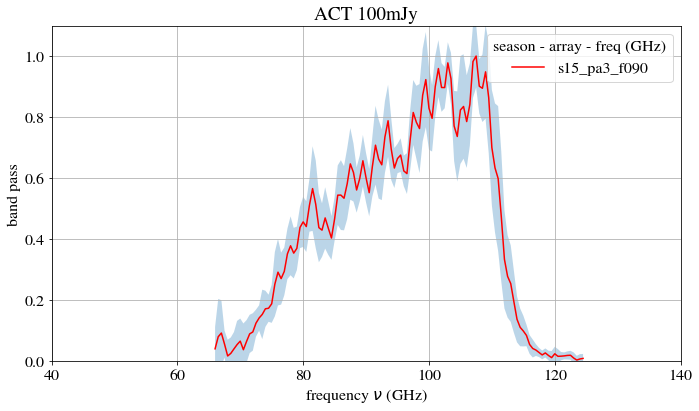

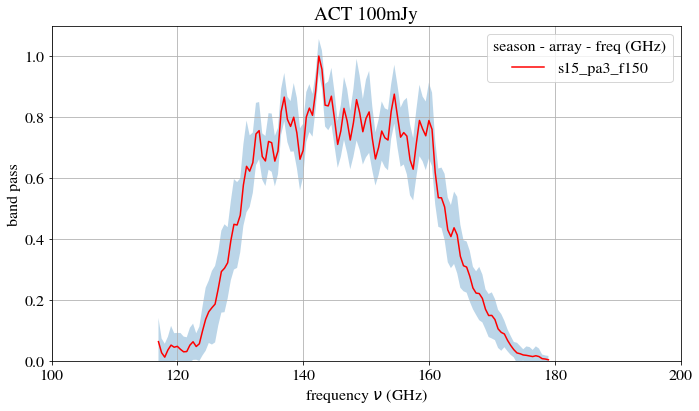

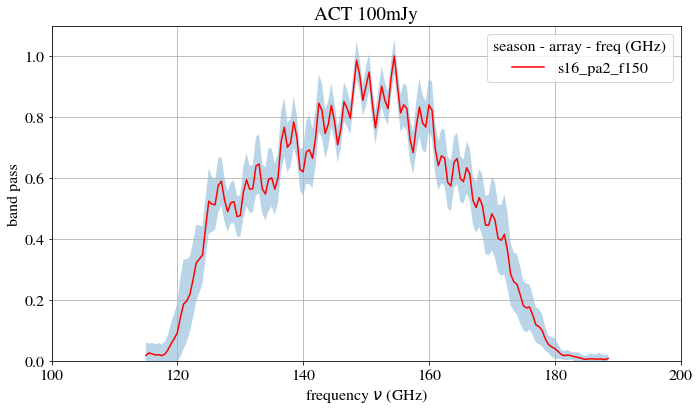

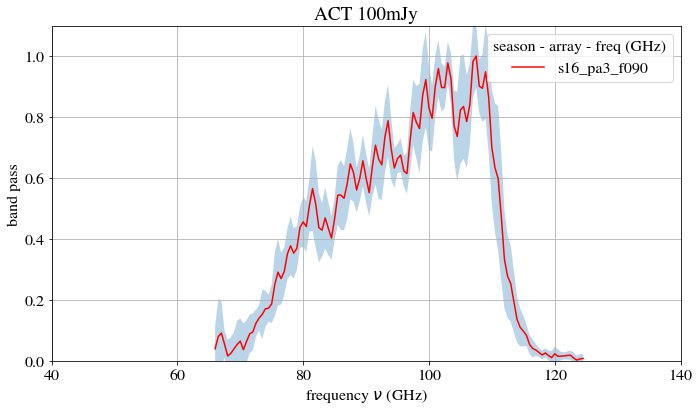

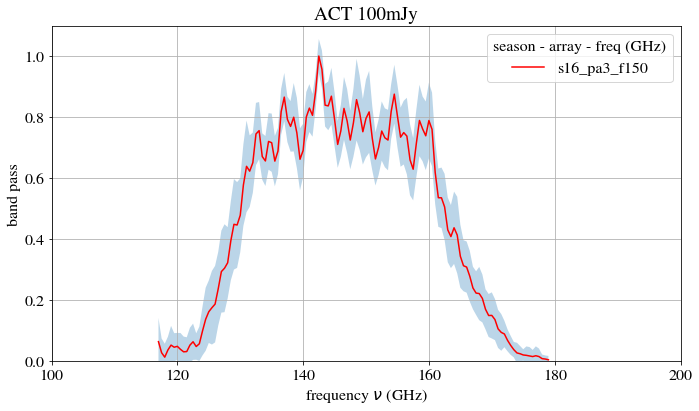

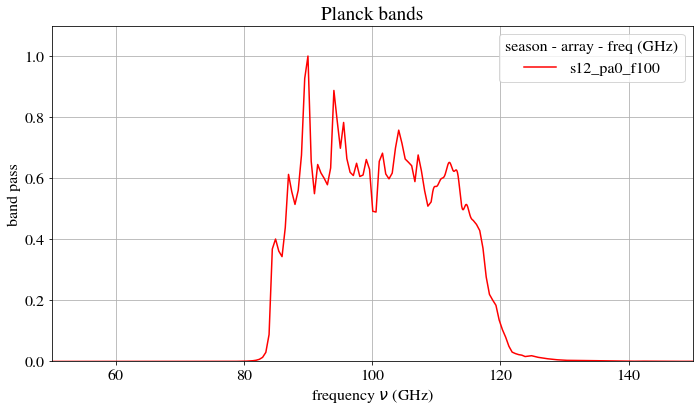

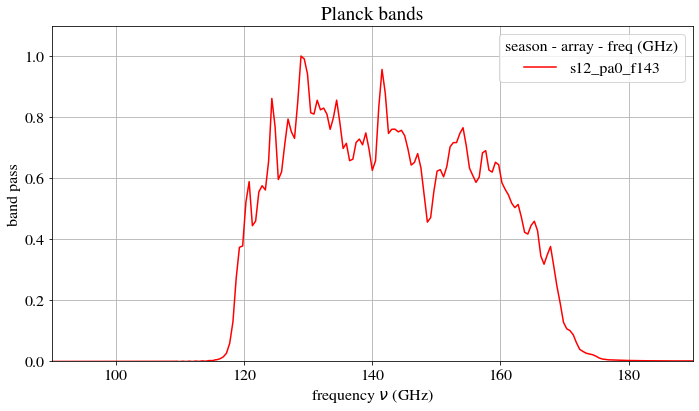

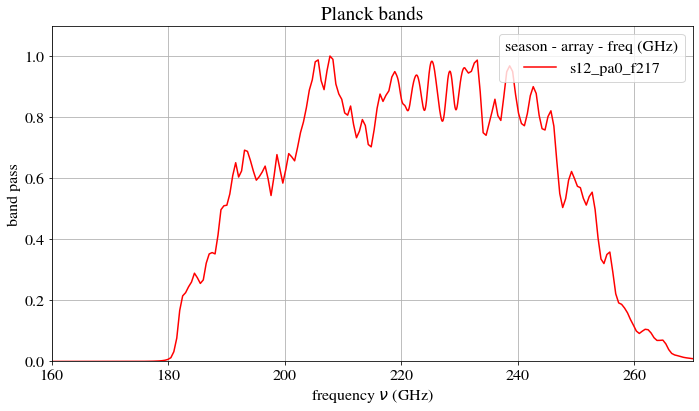

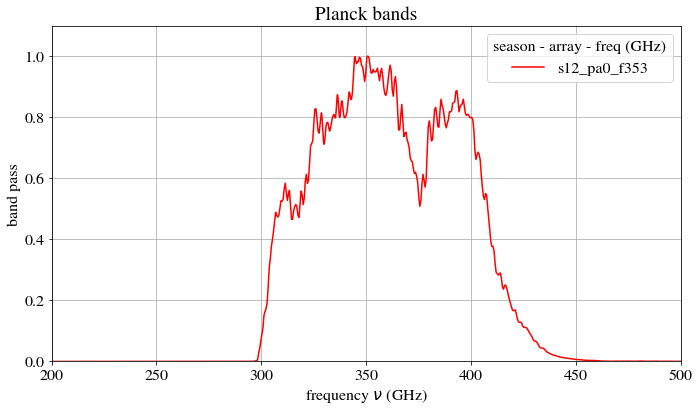

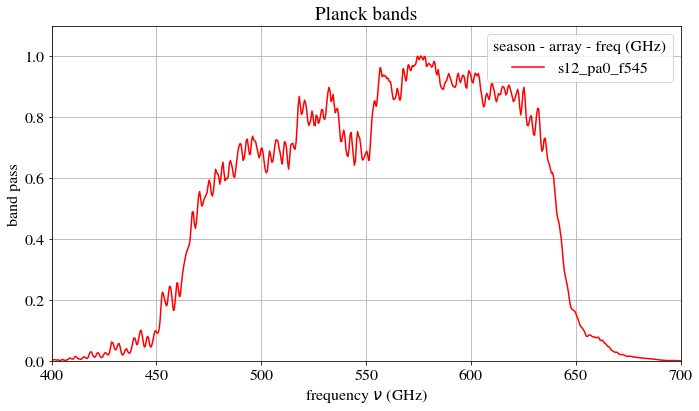

In [254]:

# bp_dict =  {'s15_pa1_f150': '/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/bplike_data/bpass/PA1_avg_passband_wErr_trunc.txt', 's15_pa2_f150': '/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/bplike_data/bpass/PA2_avg_passband_wErr_trunc.txt', 's15_pa3_f090': '/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/bplike_data/bpass/PA3_avg_passband_90_wErr_trunc.txt', 's15_pa3_f150': '/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/bplike_data/bpass/PA3_avg_passband_150_wErr_trunc.txt', 's16_pa2_f150': '/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/bplike_data/bpass/PA2_avg_passband_wErr_trunc.txt', 's16_pa3_f090': '/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/bplike_data/bpass/PA3_avg_passband_90_wErr_trunc.txt', 's16_pa3_f150': '/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/bplike_data/bpass/PA3_avg_passband_150_wErr_trunc.txt'}
bp_dict =  {'s15_pa1_f150': '/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/bplike_data/bpass/PA1_avg_passband_wErr_trunc.txt', 's15_pa2_f150': '/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/bplike_data/bpass/PA2_avg_passband_wErr_trunc.txt', 's15_pa3_f090': '/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/bplike_data/bpass/PA3_avg_passband_90_wErr_trunc.txt', 's15_pa3_f150': '/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/bplike_data/bpass/PA3_avg_passband_150_wErr_trunc.txt', 's16_pa2_f150': '/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/bplike_data/bpass/PA2_avg_passband_wErr_trunc.txt', 's16_pa3_f090': '/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/bplike_data/bpass/PA3_avg_passband_90_wErr_trunc.txt', 's16_pa3_f150': '/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/bplike_data/bpass/PA3_avg_passband_150_wErr_trunc.txt', 's12_pa0_f100': '/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/act_planck_data_210328/HFI_BANDPASS_F100_reformat.txt', 's12_pa0_f143': '/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/act_planck_data_210328/HFI_BANDPASS_F143_reformat.txt', 's12_pa0_f217': '/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/act_planck_data_210328/HFI_BANDPASS_F217_reformat.txt', 's12_pa0_f353': '/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/act_planck_data_210328/HFI_BANDPASS_F353_reformat.txt', 's12_pa0_f545': '/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/act_planck_data_210328/HFI_BANDPASS_F545_reformat.txt'}

for keys in bp_dict.keys():
#     if keys != 's15_pa3_f150':
#         continue
    
    bm = np.loadtxt(bp_dict[keys])
    plt.subplots(figsize=(10, 6))
    print('key:',keys)
    if '90' in keys or '150' in keys:
        plt.title('ACT 100mJy')
        plt.fill_between(bm[:,0],bm[:,1]+bm[:,2],bm[:,1]-bm[:,2],alpha=0.3)
        plt.plot(bm[:,0],bm[:,1],label=keys,c='r')
    else:
        plt.title('Planck bands')
        integ = np.trapz(bm[:,1],bm[:,0])
        maxim = np.max(bm[:,1])
        print('integ:',integ)
        plt.plot(bm[:,0],bm[:,1]/maxim,label=keys,c='r')
    
# plt.yscale('log')
# plt.xscale('log')
# plt.ylim(1e-13,1e-6)
# plt.xlim(50,220)
    plt.grid()
    plt.legend(title='season - array - freq (GHz)',loc=1)
    plt.ylabel(r'band pass')
    plt.xlabel(r'frequency $\nu$ (GHz)')
    
    plt.ylim(0.,1.1)
    if '90' in keys:
        plt.xlim(40,140)
    if '150' in keys:
        plt.xlim(100,200)
    if '100' in keys:
        plt.xlim(50,150)
    if '143' in keys:
        plt.xlim(90,190)
    if '217' in keys:
        plt.xlim(160,270)
    if '353' in keys:
        plt.xlim(200,500)
    if '545' in keys:
        plt.xlim(400,700)

    plt.tight_layout()
    plt.savefig('/Users/boris/Work/CLASS-SZ/SO-SZ/figures/bp_100mJy_'+keys+'.pdf')



key: s14_pa1_f150
key: s14_pa2_f150
key: s15_pa1_f150
key: s15_pa2_f150
key: s15_pa3_f090
key: s15_pa3_f150
key: s12_pa0_f100
integ: 0.9999999999992168
key: s12_pa0_f143
integ: 0.999999999999803
key: s12_pa0_f217
integ: 1.0
key: s12_pa0_f353
integ: 1.0000000000000002
key: s12_pa0_f545
integ: 0.9999999999708964


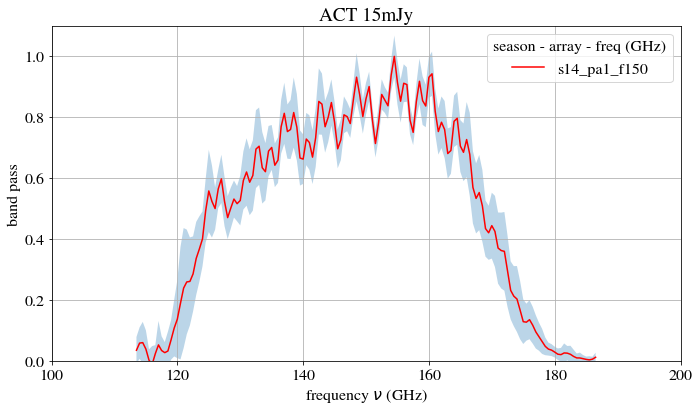

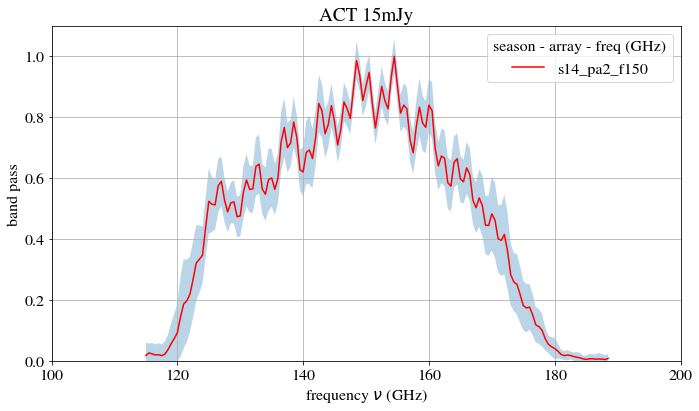

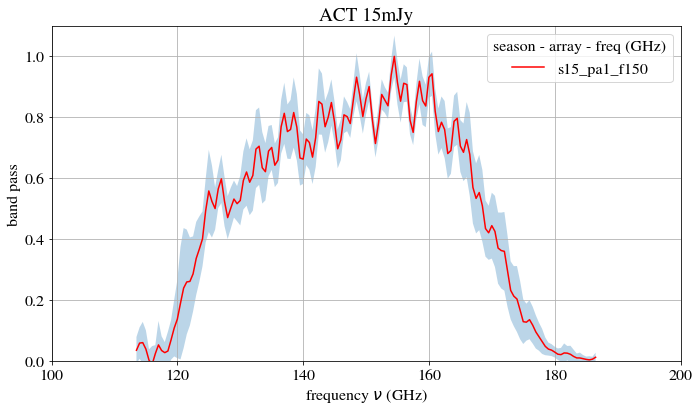

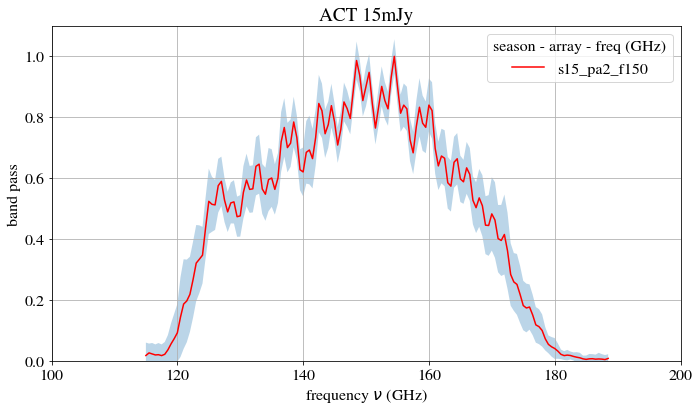

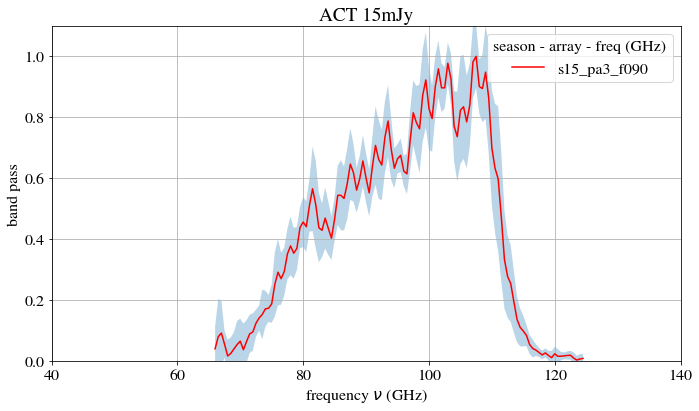

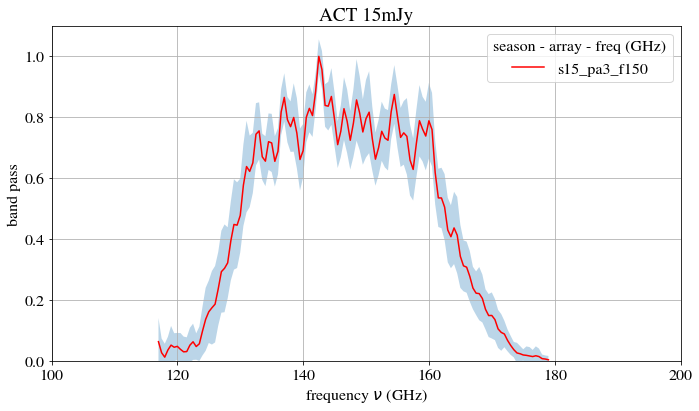

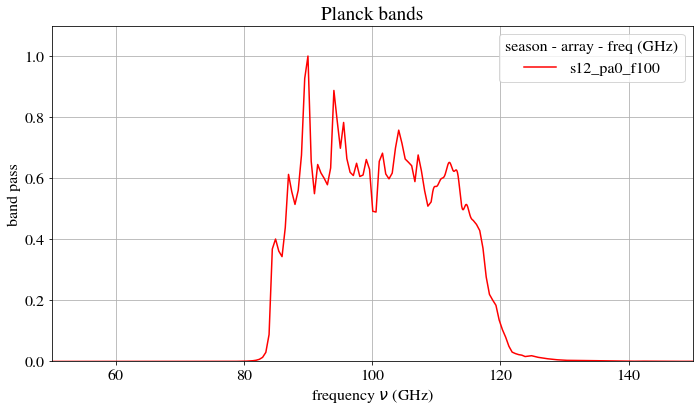

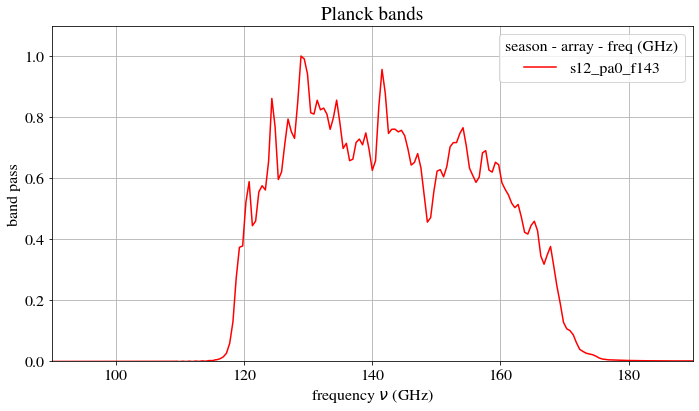

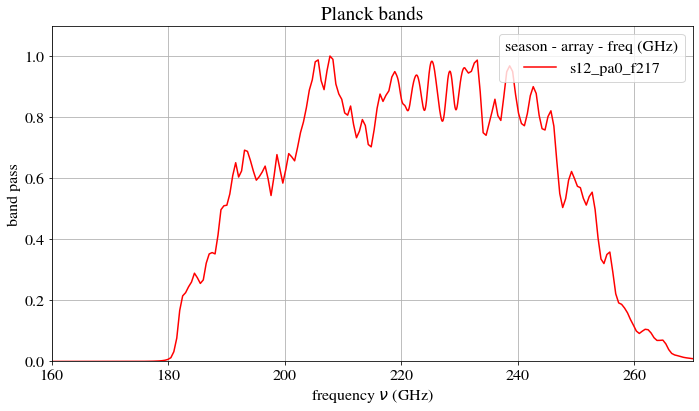

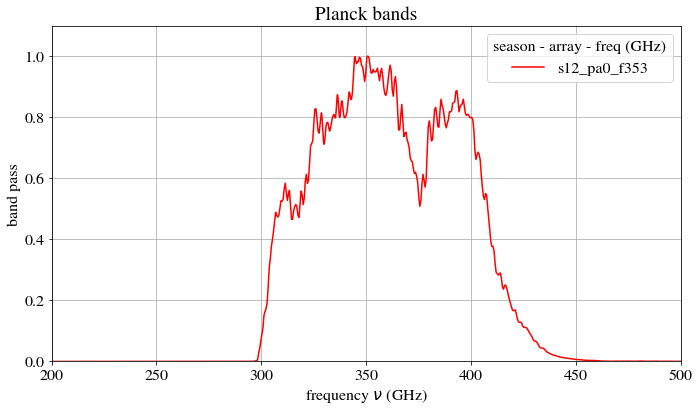

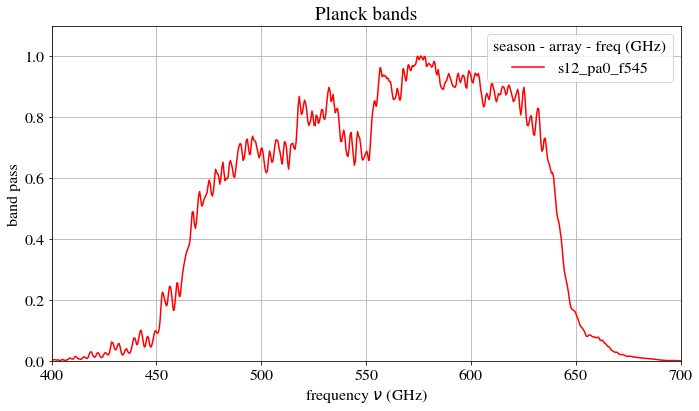

In [255]:

# bp_dict =  {'s15_pa1_f150': '/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/bplike_data/bpass/PA1_avg_passband_wErr_trunc.txt', 's15_pa2_f150': '/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/bplike_data/bpass/PA2_avg_passband_wErr_trunc.txt', 's15_pa3_f090': '/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/bplike_data/bpass/PA3_avg_passband_90_wErr_trunc.txt', 's15_pa3_f150': '/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/bplike_data/bpass/PA3_avg_passband_150_wErr_trunc.txt', 's16_pa2_f150': '/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/bplike_data/bpass/PA2_avg_passband_wErr_trunc.txt', 's16_pa3_f090': '/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/bplike_data/bpass/PA3_avg_passband_90_wErr_trunc.txt', 's16_pa3_f150': '/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/bplike_data/bpass/PA3_avg_passband_150_wErr_trunc.txt'}
bp_dict = {'s14_pa1_f150': '/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/bplike_data/bpass/PA1_avg_passband_wErr_trunc.txt', 's14_pa2_f150': '/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/bplike_data/bpass/PA2_avg_passband_wErr_trunc.txt', 's15_pa1_f150': '/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/bplike_data/bpass/PA1_avg_passband_wErr_trunc.txt', 's15_pa2_f150': '/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/bplike_data/bpass/PA2_avg_passband_wErr_trunc.txt', 's15_pa3_f090': '/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/bplike_data/bpass/PA3_avg_passband_90_wErr_trunc.txt', 's15_pa3_f150': '/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/bplike_data/bpass/PA3_avg_passband_150_wErr_trunc.txt', 's12_pa0_f100': '/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/act_planck_data_210328/HFI_BANDPASS_F100_reformat.txt', 's12_pa0_f143': '/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/act_planck_data_210328/HFI_BANDPASS_F143_reformat.txt', 's12_pa0_f217': '/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/act_planck_data_210328/HFI_BANDPASS_F217_reformat.txt', 's12_pa0_f353': '/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/act_planck_data_210328/HFI_BANDPASS_F353_reformat.txt', 's12_pa0_f545': '/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/act_planck_data_210328/HFI_BANDPASS_F545_reformat.txt'}

for keys in bp_dict.keys():
#     if keys != 's15_pa3_f150':
#         continue
    
    bm = np.loadtxt(bp_dict[keys])
    plt.subplots(figsize=(10, 6))
    print('key:',keys)
    if '90' in keys or '150' in keys:
        plt.title('ACT 15mJy')
        plt.fill_between(bm[:,0],bm[:,1]+bm[:,2],bm[:,1]-bm[:,2],alpha=0.3)
        plt.plot(bm[:,0],bm[:,1],label=keys,c='r')
    else:
        plt.title('Planck bands')
        integ = np.trapz(bm[:,1],bm[:,0])
        maxim = np.max(bm[:,1])
        print('integ:',integ)
        plt.plot(bm[:,0],bm[:,1]/maxim,label=keys,c='r')
    
# plt.yscale('log')
# plt.xscale('log')
# plt.ylim(1e-13,1e-6)
# plt.xlim(50,220)
    plt.grid()
    plt.legend(title='season - array - freq (GHz)',loc=1)
    plt.ylabel(r'band pass')
    plt.xlabel(r'frequency $\nu$ (GHz)')
    
    plt.ylim(0.,1.1)
    if '90' in keys:
        plt.xlim(40,140)
    if '150' in keys:
        plt.xlim(100,200)
    if '100' in keys:
        plt.xlim(50,150)
    if '143' in keys:
        plt.xlim(90,190)
    if '217' in keys:
        plt.xlim(160,270)
    if '353' in keys:
        plt.xlim(200,500)
    if '545' in keys:
        plt.xlim(400,700)

    plt.tight_layout()
    plt.savefig('/Users/boris/Work/CLASS-SZ/SO-SZ/figures/bp_15mJy_'+keys+'.pdf')



bands label: ['090x090', '090x100', '090x143', '090x150', '090x217', '090x353', '090x545', '100x100', '100x143', '143x143', '100x150', '143x150', '150x150', '150x217', '150x353', '150x545', '100x217', '143x217', '217x217', '100x353', '143x353', '217x353', '353x353', '100x545', '143x545', '217x545', '353x545', '545x545']
multipol bins per spectrum: 48
shape dls : (1344,)
1344


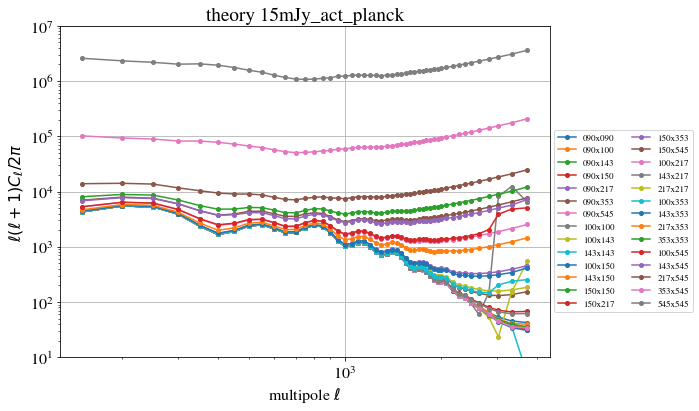

In [96]:
bps = '_'
import bplike as bp
flux  = '15mJy'
data_root = path_to_data + '/act_planck_data_210328/'   
sp = bp.StevePower_extended(data_root,flux)

label_bps = []
for b1,b2 in zip(sp.fband1,sp.fband2):
    label_bps.append(b1 +'x' +b2)
np.shape(label_bps)
print('bands label:',label_bps)
print('multipol bins per spectrum:',sp.n_bins)



ls = np.load(path_to_output+'/ls_theory_'+flux+bps+'act_planck.npy')
dls = np.load(path_to_output+'/dls_theory_'+flux+bps+'act_planck.npy')
# dls = np.load(path_to_output+'/dls_theory.npy')
print('shape dls :',np.shape(dls))
# dls = dls.reshape(48,28)
# ls = np.load(path_to_output+'/ls_theory.npy')
np.shape(dls)

n_bins = sp.n_bins

plt.subplots(figsize=(10, 6))
j = 0
print(n_bins*len(label_bps))
for i in range(n_bins*len(label_bps)):
    if i%n_bins == 0:
        j+=1
        plt.plot(ls[(j-1)*n_bins:j*n_bins],np.abs(dls[(j-1)*n_bins:j*n_bins]),
                 label=label_bps[j-1],marker='o',markersize = 4)


plt.xlabel(r'multipole $\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell/2\pi$')
plt.loglog()
plt.legend(ncol = 2 ,fontsize = 9,bbox_to_anchor=(1., 0.7))
plt.title('theory '+ flux+bps+'act_planck')
plt.grid()
plt.ylim(1e1,1e7)
plt.tight_layout()
plt.savefig('/Users/boris/Work/CLASS-SZ/SO-SZ/figures/'+flux+bps+'act_planck.pdf')

bands label: ['090x090', '090x100', '090x143', '090x150', '090x217', '090x353', '090x545', '100x100', '100x143', '143x143', '100x150', '143x150', '150x150', '150x217', '150x353', '150x545', '100x217', '143x217', '217x217', '100x353', '143x353', '217x353', '353x353', '100x545', '143x545', '217x545', '353x545', '545x545']
multipol bins per spectrum: 48
shape dls : (1344,)
1344


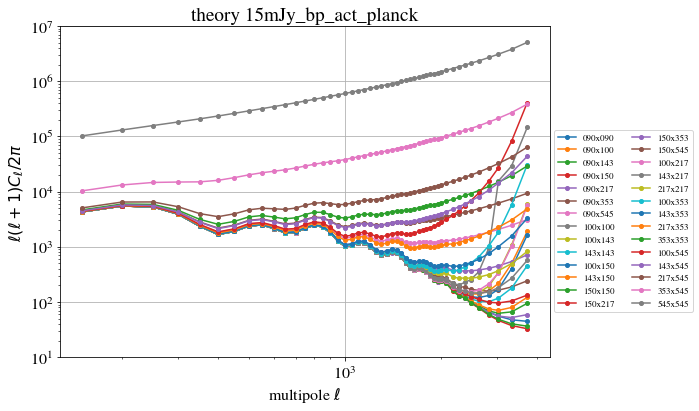

In [95]:
bps = '_bp_'
import bplike as bp
flux  = '15mJy'
data_root = path_to_data + '/act_planck_data_210328/'   
sp = bp.StevePower_extended(data_root,flux)

label_bps = []
for b1,b2 in zip(sp.fband1,sp.fband2):
    label_bps.append(b1 +'x' +b2)
np.shape(label_bps)
print('bands label:',label_bps)
print('multipol bins per spectrum:',sp.n_bins)



ls = np.load(path_to_output+'/ls_theory_'+flux+bps+'act_planck.npy')
dls = np.load(path_to_output+'/dls_theory_'+flux+bps+'act_planck.npy')
# dls = np.load(path_to_output+'/dls_theory.npy')
print('shape dls :',np.shape(dls))
# dls = dls.reshape(48,28)
# ls = np.load(path_to_output+'/ls_theory.npy')
np.shape(dls)

n_bins = sp.n_bins

plt.subplots(figsize=(10, 6))
j = 0
print(n_bins*len(label_bps))
for i in range(n_bins*len(label_bps)):
    if i%n_bins == 0:
        j+=1
        plt.plot(ls[(j-1)*n_bins:j*n_bins],np.abs(dls[(j-1)*n_bins:j*n_bins]),
                 label=label_bps[j-1],marker='o',markersize = 4)


plt.xlabel(r'multipole $\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell/2\pi$')
plt.ylim(1e1,1e7)
plt.loglog()
plt.legend(ncol = 2 ,fontsize = 9,bbox_to_anchor=(1., 0.7))
plt.title('theory '+flux+bps+'act_planck')
plt.grid()
plt.tight_layout()
plt.savefig('/Users/boris/Work/CLASS-SZ/SO-SZ/figures/'+flux+bps+'act_planck.pdf')

bands label: ['090x090', '090x100', '090x143', '090x150', '090x217', '090x353', '090x545', '100x100', '100x143', '143x143', '100x150', '143x150', '150x150', '150x217', '150x353', '150x545', '100x217', '143x217', '217x217', '100x353', '143x353', '217x353', '353x353', '100x545', '143x545', '217x545', '353x545', '545x545']
multipol bins per spectrum: 48
shape dls : (1344,)
1344


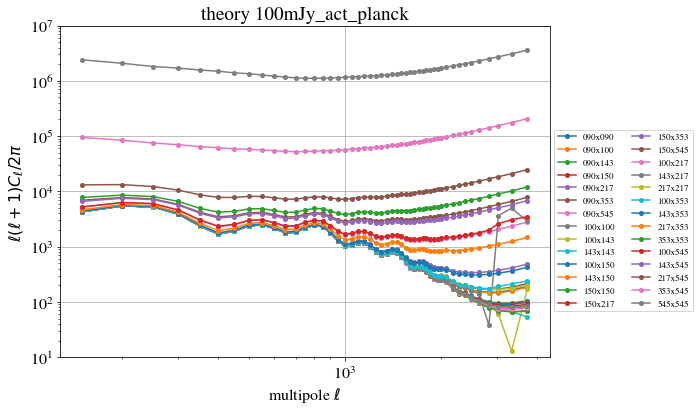

In [94]:
bps = '_'
import bplike as bp
flux  = '100mJy'
data_root = path_to_data + '/act_planck_data_210328/'   
sp = bp.StevePower_extended(data_root,flux)

label_bps = []
for b1,b2 in zip(sp.fband1,sp.fband2):
    label_bps.append(b1 +'x' +b2)
np.shape(label_bps)
print('bands label:',label_bps)
print('multipol bins per spectrum:',sp.n_bins)



ls = np.load(path_to_output+'/ls_theory_'+flux+bps+'act_planck.npy')
dls = np.load(path_to_output+'/dls_theory_'+flux+bps+'act_planck.npy')
# dls = np.load(path_to_output+'/dls_theory.npy')
print('shape dls :',np.shape(dls))
# dls = dls.reshape(48,28)
# ls = np.load(path_to_output+'/ls_theory.npy')
np.shape(dls)

n_bins = sp.n_bins

plt.subplots(figsize=(10, 6))
j = 0
print(n_bins*len(label_bps))
for i in range(n_bins*len(label_bps)):
    if i%n_bins == 0:
        j+=1
        plt.plot(ls[(j-1)*n_bins:j*n_bins],np.abs(dls[(j-1)*n_bins:j*n_bins]),
                 label=label_bps[j-1],marker='o',markersize = 4)


plt.xlabel(r'multipole $\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell/2\pi$')
plt.ylim(1e1,1e7)
plt.loglog()
plt.legend(ncol = 2 ,fontsize = 9,bbox_to_anchor=(1., 0.7))
plt.title('theory ' + flux+bps+'act_planck')
plt.grid()
plt.tight_layout()
plt.savefig('/Users/boris/Work/CLASS-SZ/SO-SZ/figures/'+flux+bps+'act_planck.pdf')

bands label: ['090x090', '090x100', '090x143', '090x150', '090x217', '090x353', '090x545', '100x100', '100x143', '143x143', '100x150', '143x150', '150x150', '150x217', '150x353', '150x545', '100x217', '143x217', '217x217', '100x353', '143x353', '217x353', '353x353', '100x545', '143x545', '217x545', '353x545', '545x545']
multipol bins per spectrum: 48
shape dls : (1344,)
1344


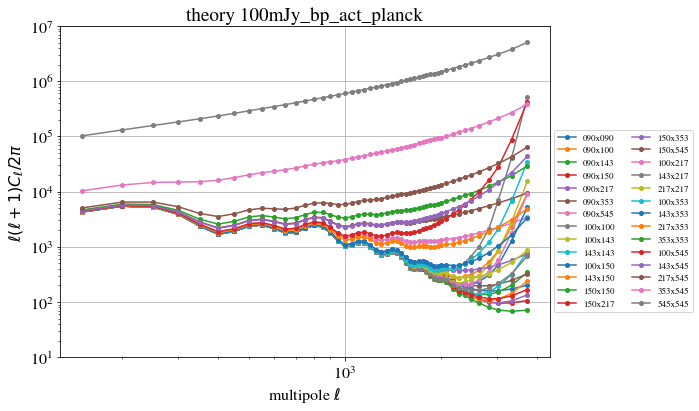

In [93]:
bps = '_bp_'
import bplike as bp
flux  = '100mJy'
data_root = path_to_data + '/act_planck_data_210328/'   
sp = bp.StevePower_extended(data_root,flux)

label_bps = []
for b1,b2 in zip(sp.fband1,sp.fband2):
    label_bps.append(b1 +'x' +b2)
np.shape(label_bps)
print('bands label:',label_bps)
print('multipol bins per spectrum:',sp.n_bins)



ls = np.load(path_to_output+'/ls_theory_'+flux+bps+'act_planck.npy')
dls = np.load(path_to_output+'/dls_theory_'+flux+bps+'act_planck.npy')
# dls = np.load(path_to_output+'/dls_theory.npy')
print('shape dls :',np.shape(dls))
# dls = dls.reshape(48,28)
# ls = np.load(path_to_output+'/ls_theory.npy')
np.shape(dls)

n_bins = sp.n_bins

plt.subplots(figsize=(10, 6))
j = 0
print(n_bins*len(label_bps))
for i in range(n_bins*len(label_bps)):
    if i%n_bins == 0:
        j+=1
        plt.plot(ls[(j-1)*n_bins:j*n_bins],np.abs(dls[(j-1)*n_bins:j*n_bins]),
                 label=label_bps[j-1],marker='o',markersize = 4)


plt.xlabel(r'multipole $\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell/2\pi$')
plt.ylim(1e1,1e7)
plt.loglog()
plt.legend(ncol = 2 ,fontsize = 9,bbox_to_anchor=(1., 0.7))
plt.title('theory '+flux+bps+'act_planck')
plt.grid()
plt.tight_layout()
plt.savefig('/Users/boris/Work/CLASS-SZ/SO-SZ/figures/'+flux+bps+'act_planck.pdf')

bands label: ['T095xT095', 'T095xT150', 'T150xT150', 'T095xE095', 'T095xE150', 'T150xE095', 'T150xE150', 'E095xE095', 'E095xE150', 'E150xE150']
multipol bins per spectrum: 52
shape dls : (520,)
520


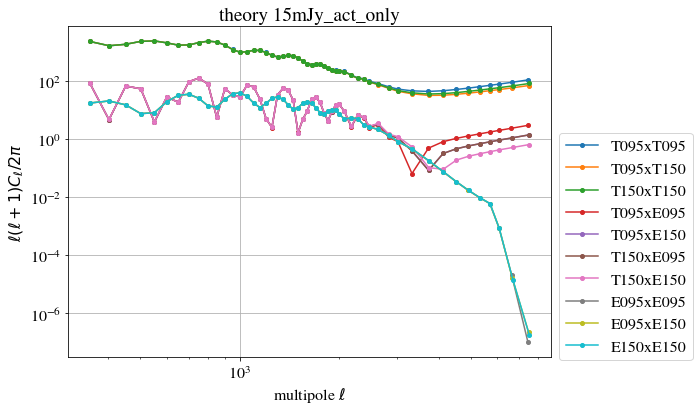

In [61]:
bps = '_'
import bplike as bp
flux  = '15mJy'
data_root = dfroot  
sp = bp.StevePower(data_root,flux)

label_bps = []
for b1,b2 in zip(sp.fband1,sp.fband2):
    label_bps.append(b1 +'x' +b2)
np.shape(label_bps)
print('bands label:',label_bps)
print('multipol bins per spectrum:',sp.n_bins)



ls = np.load(path_to_output+'/ls_theory_'+flux+bps+'act_only.npy')
dls = np.load(path_to_output+'/dls_theory_'+flux+bps+'act_only.npy')
# dls = np.load(path_to_output+'/dls_theory.npy')
print('shape dls :',np.shape(dls))
# dls = dls.reshape(48,28)
# ls = np.load(path_to_output+'/ls_theory.npy')
np.shape(dls)

n_bins = sp.n_bins

plt.subplots(figsize=(10, 6))
j = 0
print(n_bins*len(label_bps))
for i in range(n_bins*len(label_bps)):
    if i%n_bins == 0:
        j+=1
        plt.plot(ls[(j-1)*n_bins:j*n_bins],np.abs(dls[(j-1)*n_bins:j*n_bins]),
                 label=label_bps[j-1],marker='o',markersize = 4)


plt.xlabel(r'multipole $\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell/2\pi$')
plt.loglog()
plt.legend(bbox_to_anchor=(1., 0.7))
plt.title('theory '+flux+bps+'act_only')
plt.grid()
plt.tight_layout()
plt.savefig('/Users/boris/Work/CLASS-SZ/SO-SZ/figures/'+flux+bps+'act_only.pdf')

bands label: ['T095xT095', 'T095xT150', 'T150xT150', 'T095xE095', 'T095xE150', 'T150xE095', 'T150xE150', 'E095xE095', 'E095xE150', 'E150xE150']
multipol bins per spectrum: 52
shape dls : (520,)
520


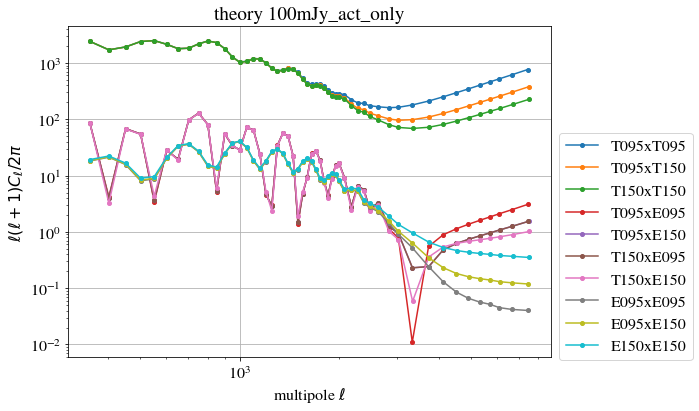

In [92]:
bps = '_'
import bplike as bp
flux  = '100mJy'
data_root = dfroot  
sp = bp.StevePower(data_root,flux)

label_bps = []
for b1,b2 in zip(sp.fband1,sp.fband2):
    label_bps.append(b1 +'x' +b2)
np.shape(label_bps)
print('bands label:',label_bps)
print('multipol bins per spectrum:',sp.n_bins)



ls = np.load(path_to_output+'/ls_theory_'+flux+bps+'act_only.npy')
dls = np.load(path_to_output+'/dls_theory_'+flux+bps+'act_only.npy')
# dls = np.load(path_to_output+'/dls_theory.npy')
print('shape dls :',np.shape(dls))
# dls = dls.reshape(48,28)
# ls = np.load(path_to_output+'/ls_theory.npy')
np.shape(dls)

n_bins = sp.n_bins

plt.subplots(figsize=(10, 6))
j = 0
print(n_bins*len(label_bps))
for i in range(n_bins*len(label_bps)):
    if i%n_bins == 0:
        j+=1
        plt.plot(ls[(j-1)*n_bins:j*n_bins],np.abs(dls[(j-1)*n_bins:j*n_bins]),
                 label=label_bps[j-1],marker='o',markersize = 4)


plt.xlabel(r'multipole $\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell/2\pi$')
plt.loglog()
plt.legend(bbox_to_anchor=(1., 0.7))
plt.title('theory '+flux+bps+'act_only')
plt.grid()
plt.tight_layout()
plt.savefig('/Users/boris/Work/CLASS-SZ/SO-SZ/figures/'+flux+bps+'act_only.pdf')

bands label: ['T095xT095', 'T095xT150', 'T150xT150', 'T095xE095', 'T095xE150', 'T150xE095', 'T150xE150', 'E095xE095', 'E095xE150', 'E150xE150']
multipol bins per spectrum: 52
shape dls : (520,)
520


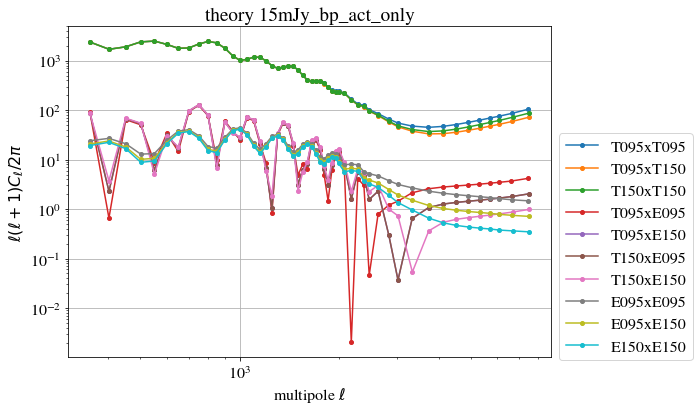

In [91]:
bps = '_bp_'
import bplike as bp
flux  = '15mJy'
data_root = dfroot  
sp = bp.StevePower(data_root,flux)

label_bps = []
for b1,b2 in zip(sp.fband1,sp.fband2):
    label_bps.append(b1 +'x' +b2)
np.shape(label_bps)
print('bands label:',label_bps)
print('multipol bins per spectrum:',sp.n_bins)



ls = np.load(path_to_output+'/ls_theory_'+flux+bps+'act_only.npy')
dls = np.load(path_to_output+'/dls_theory_'+flux+bps+'act_only.npy')
# dls = np.load(path_to_output+'/dls_theory.npy')
print('shape dls :',np.shape(dls))
# dls = dls.reshape(48,28)
# ls = np.load(path_to_output+'/ls_theory.npy')
np.shape(dls)

n_bins = sp.n_bins

plt.subplots(figsize=(10, 6))
j = 0
print(n_bins*len(label_bps))
for i in range(n_bins*len(label_bps)):
    if i%n_bins == 0:
        j+=1
        plt.plot(ls[(j-1)*n_bins:j*n_bins],np.abs(dls[(j-1)*n_bins:j*n_bins]),
                 label=label_bps[j-1],marker='o',markersize = 4)


plt.xlabel(r'multipole $\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell/2\pi$')
plt.loglog()
plt.legend(bbox_to_anchor=(1., 0.7))
plt.title('theory '+flux+bps+'act_only')
plt.grid()
plt.tight_layout()
plt.savefig('/Users/boris/Work/CLASS-SZ/SO-SZ/figures/'+flux+bps+'act_only.pdf')

bands label: ['T095xT095', 'T095xT150', 'T150xT150', 'T095xE095', 'T095xE150', 'T150xE095', 'T150xE150', 'E095xE095', 'E095xE150', 'E150xE150']
multipol bins per spectrum: 52
shape dls : (520,)
520


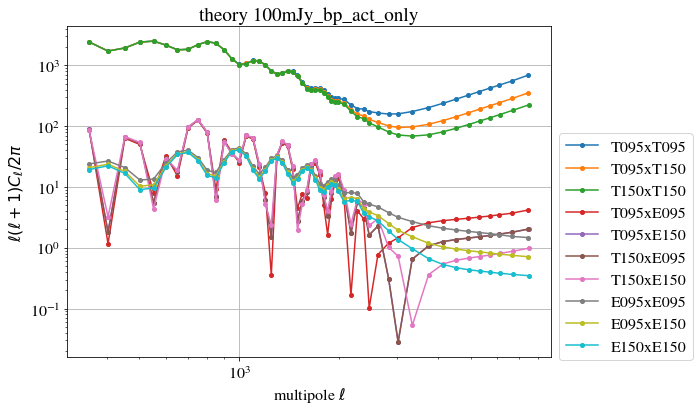

In [90]:
bps = '_bp_'
import bplike as bp
flux  = '100mJy'
data_root = dfroot  
sp = bp.StevePower(data_root,flux)

label_bps = []
for b1,b2 in zip(sp.fband1,sp.fband2):
    label_bps.append(b1 +'x' +b2)
np.shape(label_bps)
print('bands label:',label_bps)
print('multipol bins per spectrum:',sp.n_bins)



ls = np.load(path_to_output+'/ls_theory_'+flux+bps+'act_only.npy')
dls = np.load(path_to_output+'/dls_theory_'+flux+bps+'act_only.npy')
# dls = np.load(path_to_output+'/dls_theory.npy')
print('shape dls :',np.shape(dls))
# dls = dls.reshape(48,28)
# ls = np.load(path_to_output+'/ls_theory.npy')
np.shape(dls)

n_bins = sp.n_bins

plt.subplots(figsize=(10, 6))
j = 0
print(n_bins*len(label_bps))
for i in range(n_bins*len(label_bps)):
    if i%n_bins == 0:
        j+=1
        plt.plot(ls[(j-1)*n_bins:j*n_bins],np.abs(dls[(j-1)*n_bins:j*n_bins]),
                 label=label_bps[j-1],marker='o',markersize = 4)


plt.xlabel(r'multipole $\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell/2\pi$')
plt.loglog()
plt.legend(bbox_to_anchor=(1., 0.7))
plt.title('theory '+flux+bps+'act_only')
plt.grid()
plt.tight_layout()
plt.savefig('/Users/boris/Work/CLASS-SZ/SO-SZ/figures/'+flux+bps+'act_only.pdf')

bands label: ['090x090', '090x100', '090x143', '090x150', '090x217', '090x353', '090x545', '100x100', '100x143', '143x143', '100x150', '143x150', '150x150', '150x217', '150x353', '150x545', '100x217', '143x217', '217x217', '100x353', '143x353', '217x353', '353x353', '100x545', '143x545', '217x545', '353x545', '545x545']
multipol bins per spectrum: 48
shape dls : (1344,)
1344


<ipython-input-89-fd202e4e114b>:53: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


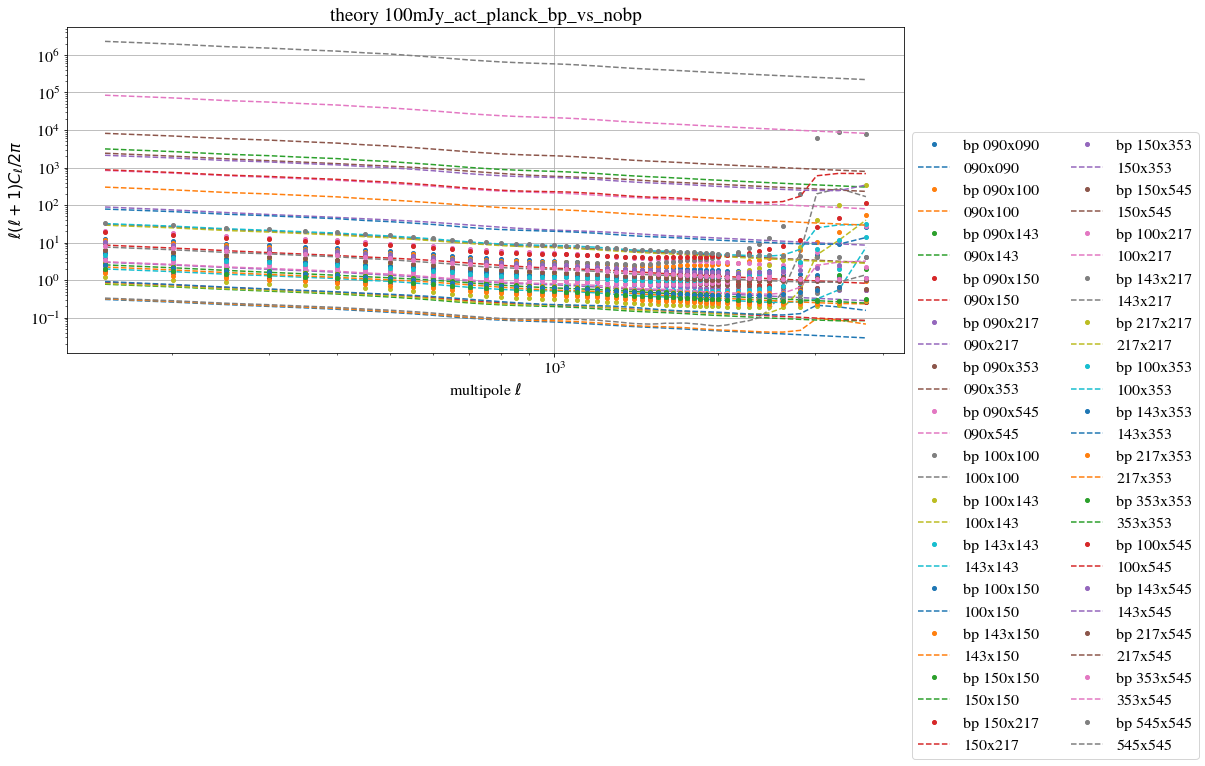

In [89]:

import bplike as bp
flux  = '100mJy'
 
lkl = 'act_planck'
if lkl == 'act_planck':
    data_root = path_to_data + '/act_planck_data_210328/'  
    sp = bp.StevePower_extended(data_root,flux)
else:
    data_root = dfroot 
    sp = bp.StevePower(data_root,flux)

comp = 'galdust'

label_bps = []
for b1,b2 in zip(sp.fband1,sp.fband2):
    label_bps.append(b1 +'x' +b2)
np.shape(label_bps)
print('bands label:',label_bps)
print('multipol bins per spectrum:',sp.n_bins)



ls = np.load(path_to_output+'/ls_theory_'+flux+bps+lkl+'.npy')
dls = np.load(path_to_output+'/dls_theory_'+comp+'_'+flux+'_'+lkl+'.npy')
bps = '_bp_'
dls_bp = np.load(path_to_output+'/dls_theory_'+comp+'_'+flux+bps+lkl+'.npy')
# dls = np.load(path_to_output+'/dls_theory.npy')
print('shape dls :',np.shape(dls))
# dls = dls.reshape(48,28)
# ls = np.load(path_to_output+'/ls_theory.npy')
np.shape(dls)

n_bins = sp.n_bins

plt.subplots(figsize=(15, 6))
j = 0
print(n_bins*len(label_bps))
for i in range(n_bins*len(label_bps)):
    if i%n_bins == 0:
        j+=1
        line, = plt.plot(ls[(j-1)*n_bins:j*n_bins],np.abs(dls_bp[(j-1)*n_bins:j*n_bins]),
                 label='bp '+label_bps[j-1],marker='o',markersize = 4,ls='None')
        plt.plot(ls[(j-1)*n_bins:j*n_bins],np.abs(dls[(j-1)*n_bins:j*n_bins]),color = line.get_color(),
         label=label_bps[j-1],marker='None',markersize = 4,ls='--')


plt.xlabel(r'multipole $\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell/2\pi$')
plt.loglog()
plt.legend(bbox_to_anchor=(1., 0.7),ncol=2)
plt.title('theory '+flux+'_'+lkl+'_bp_vs_nobp')
plt.grid()
plt.tight_layout()
plt.savefig('/Users/boris/Work/CLASS-SZ/SO-SZ/figures/'+flux+'_'+comp+'_'+lkl+'_bp_vs_nobp.pdf')

In [159]:
def compute_noise():
    # Planck freqs -- no 545 or 857
    Nfreqs_Planck= 9 #9
    freqs_Planck = []
#     freqs_Planck.append('030')
#     freqs_Planck.append('044')
#     freqs_Planck.append('070')
    freqs_Planck.append('100')
    freqs_Planck.append('143')
    freqs_Planck.append('217')
    freqs_Planck.append('353')
    freqs_Planck.append('545')
#     freqs_Planck.append('857')
    #freqs_Planck_float = np.array([30.0e9, 44.0e9, 70.0e9, 100.0e9, 143.0e9, 217.0e9, 353.0e9])
    freqs_Planck_float = np.array([
                                   #30.0e9, 
                                   #44.0e9, 
                                   #70.0e9, 
                                   100.0e9, 
                                   143.0e9, 
                                   217.0e9, 
                                   353.0e9,
                                   545.0e9#,
                                   #857.0e9
                                  ])

    # Planck noise
    noise_arr_Planck = np.zeros(Nfreqs_Planck)
#     noise_arr_Planck[0] = 195.079975053 #uK-arcmin, from Table 7 (first column) of https://arxiv.org/pdf/1502.01585.pdf -- converted via sqrt(3224.4*(4*Pi*(180/Pi)^2*60^2/(12*1024^2)))
#     noise_arr_Planck[1] = 226.090506617 # converted via sqrt(4331.0*(4*Pi*(180/Pi)^2*60^2/(12*1024^2)))
#     noise_arr_Planck[2] = 199.09525581 # converted via sqrt(3358.5*(4*Pi*(180/Pi)^2*60^2/(12*1024^2))) assuming Nside=1024... I think this is the right assumption (would be lower for 2048)
    noise_arr_Planck[0] = 77.4 #uK-arcmin, from Table 6 of https://arxiv.org/pdf/1502.01587v2.pdf
    noise_arr_Planck[1] = 33.0
    noise_arr_Planck[2] = 46.8
    noise_arr_Planck[3] = 153.6
    noise_arr_Planck[4] = 0.78 #kJy/sr * deg -- need to convert to uK-arcmin
#     noise_arr_Planck[8] = 0.72 #kJy/sr * deg -- need to convert to uK-arcmin

    # Planck beams
    FWHM_arr_Planck = np.zeros(Nfreqs_Planck)
#     FWHM_arr_Planck[0] = 32.239
#     FWHM_arr_Planck[1] = 27.005
#     FWHM_arr_Planck[2] = 13.252
    FWHM_arr_Planck[0] = 9.69 #arcmin, from Table 6 of https://arxiv.org/pdf/1502.01587v2.pdf
    FWHM_arr_Planck[1] = 7.30
    FWHM_arr_Planck[2] = 5.02
    FWHM_arr_Planck[3] = 4.94
    FWHM_arr_Planck[4] = 4.83
#     FWHM_arr_Planck[8] = 4.64
    # convert to sigma in radians
    sigma_arr_Planck = FWHM_arr_Planck / np.sqrt(8. * np.log(2)) /60. * np.pi/180.

    # Planck noise power spectra
    ELLMAX=30000
    ELL = np.arange(ELLMAX+1)
    MAX_NOISE = 1.e-9 #prevent overflow due to high noise in Planck
    PS_noise_Planck = np.zeros((Nfreqs_Planck,ELLMAX+1))
    for i in range(Nfreqs_Planck):#factpr 2 for half mission
        PS_noise_Planck[i] = (noise_arr_Planck[i] * (1.0/60.0) * (np.pi/180.0))**-2.0 * np.exp( -ELL*(ELL+1)* sigma_arr_Planck[i]**2. )/(2.725e6)**-2

        # handle overflow due to high noise at high ell, if needed
        PS_noise_Planck[i][(np.where(PS_noise_Planck[i] < MAX_NOISE))[0]] = MAX_NOISE

    dict_results = dict(zip(freqs_Planck, PS_noise_Planck))

    return ELL,dict_results


In [160]:
bs12 = compute_noise()

<ipython-input-159-905650140909>:59: RuntimeWarning: divide by zero encountered in double_scalars
  PS_noise_Planck[i] = (noise_arr_Planck[i] * (1.0/60.0) * (np.pi/180.0))**-2.0 * np.exp( -ELL*(ELL+1)* sigma_arr_Planck[i]**2. )/(2.725e6)**-2


In [161]:
np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/act_planck_data_210328/HFI_BEAM_F100.txt',
           np.c_[bs12[0],bs12[1]['100']])
np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/act_planck_data_210328/HFI_BEAM_F143.txt',
           np.c_[bs12[0],bs12[1]['143']])
np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/act_planck_data_210328/HFI_BEAM_F217.txt',
           np.c_[bs12[0],bs12[1]['217']])
np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/act_planck_data_210328/HFI_BEAM_F353.txt',
           np.c_[bs12[0],bs12[1]['353']])
np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/bplike/data/act_planck_data_210328/HFI_BEAM_F545.txt',
           np.c_[bs12[0],bs12[1]['545']])

In [257]:
import bplike as bp
flux  = '15mJy'
sp = bp.StevePower_extended(data_root,'100mJy')

label_bps = []
for b1,b2 in zip(sp.fband1,sp.fband2):
    label_bps.append(b1 +'x' +b2)
np.shape(label_bps)
label_bps[0]

'090x090'

shape dls : (1344,)
shape ls : (1344,)


Text(0.5, 1.0, 'theory')

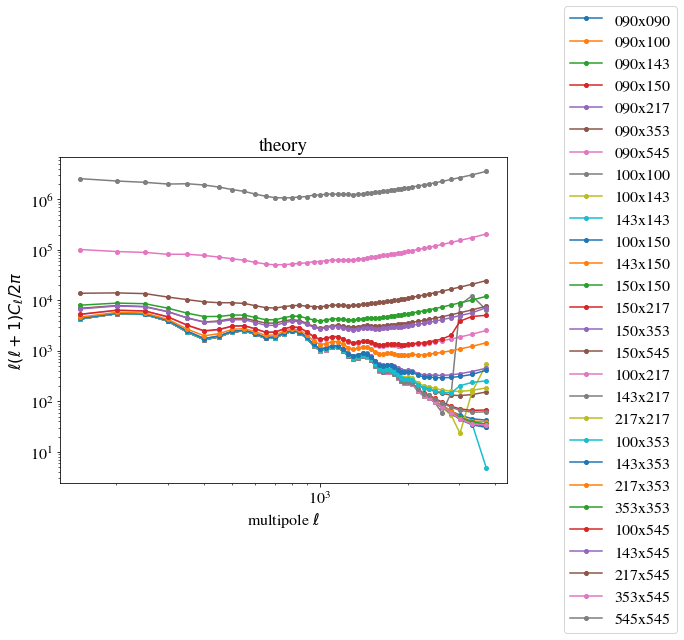

In [258]:
dls = np.load(path_to_output+'/dls_theory.npy')
print('shape dls :',np.shape(dls))
# dls = dls.reshape(48,28)
ls = np.load(path_to_output+'/ls_theory.npy')
print('shape ls :',np.shape(ls))
# ls = ls.reshape(48,28)
n_bins = 48
j = 0
for i in range(1344):
    if i%n_bins == 0:
        j+=1
        plt.plot(ls[(j-1)*n_bins:j*n_bins],np.abs(dls[(j-1)*n_bins:j*n_bins]),
                 label=label_bps[j-1],marker='o',markersize = 4)


plt.xlabel(r'multipole $\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell/2\pi$')
plt.loglog()
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5))
plt.title('theory')
# plt.savefig('dls_theory_d56.pdf')

shape dls : (1344,)
dls 0-10 : [4302.68784911 5477.78767701 5288.38431005 3897.20948216 2365.37056872
 1667.95193847 1897.98854194 2388.71210509 2483.44702498 2127.96755259]
shape ls : (1344,)
1
2
3
4
5
6
7
8


Text(0.5, 1.0, 'theory')

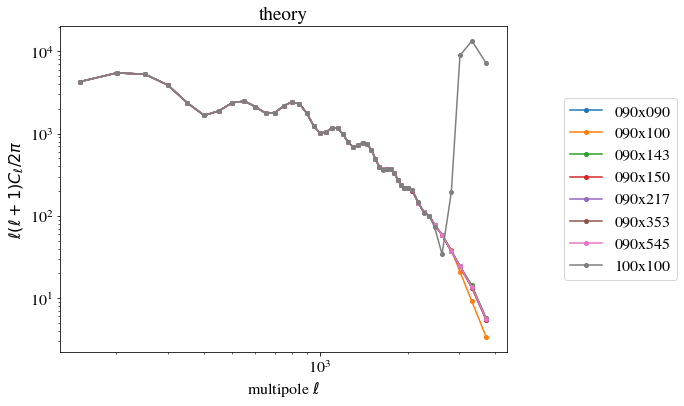

In [259]:
dls = np.load(path_to_output+'/dls_theory_primary.npy')
print('shape dls :',np.shape(dls))
print('dls 0-10 :', dls[0:10])
# dls = dls.reshape(48,28)
ls = np.load(path_to_output+'/ls_theory.npy')
print('shape ls :',np.shape(ls))
# ls = ls.reshape(48,28)
n_bins = 48
j = 0
for j in range(1,9):
    print(j)
    plt.plot(ls[(j-1)*n_bins:j*n_bins],np.abs(dls[(j-1)*n_bins:j*n_bins]),
         label=label_bps[j-1],marker='o',markersize = 4)


plt.xlabel(r'multipole $\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell/2\pi$')
plt.loglog()
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5))
plt.title('theory')
# plt.savefig('dls_theory.pdf')

In [105]:

rfroot = 'deep56'
spec = np.load(data_root+f'{rfroot}_all_ps_mean_C_ell_data_210327.npy')
cov = np.load(data_root+f'{rfroot}_all_ps_Cov_from_coadd_ps_210327.npy')
bbl = np.load(data_root+f'{rfroot}_bpwf_210327.npy')
l_min = 2
# print('bbl shape:',np.shape(bbl))
n_specs = len(specs)
# print('n_specs: ',n_specs)
n_bins = int(len(spec)/n_specs)
print('n_bins: ',n_bins)
n_ells = np.shape(bbl)[1]
# print('n_ells: ',n_ells)
n_ells = n_ells-l_min
bbl_2 = np.zeros((n_bins*n_specs,n_ells))
for i in range(n_bins*n_specs):
    bbl_2[i,:] = np.delete(bbl[i,:],[0,1])
# print(len(bbl_2[0,:]))
l_min = 2
ells = np.arange(l_min,n_ells+2)



n_bins = n_bins

bbl = bbl_2.reshape((n_specs,n_bins,n_ells))

n_bins:  48


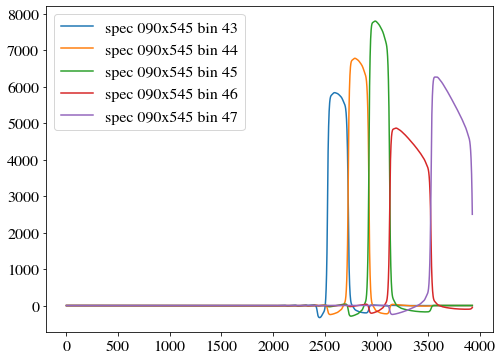

In [118]:
j = 6
for i in range(43,48):
    plt.plot(ells,bbl[j,i,:],label='spec %s bin %d'%(label_bps[j],i))
plt.legend()

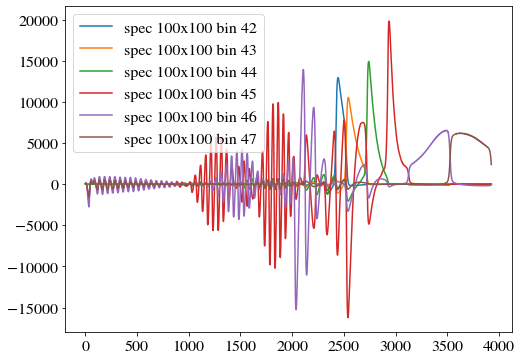

In [120]:
j = 7
for i in range(42,48):
    plt.plot(ells,bbl[j,i,:],label='spec %s bin %d'%(label_bps[j],i))
plt.legend()

shape dls : (1344,)
dls 0-10 : [0.32645386 0.29827954 0.28209182 0.24723746 0.25219823 0.2298512
 0.19853228 0.18021572 0.15133716 0.12579127]
shape ls : (1344,)


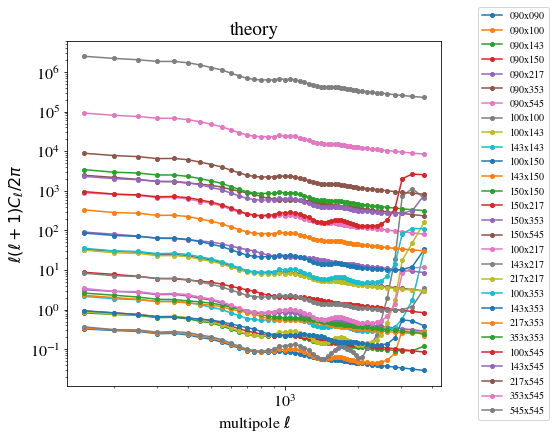

In [133]:
dls = np.load(path_to_output+'/dls_theory_galdust.npy')
print('shape dls :',np.shape(dls))
print('dls 0-10 :', dls[0:10])
# dls = dls.reshape(48,28)
ls = np.load(path_to_output+'/ls_theory.npy')
print('shape ls :',np.shape(ls))
# ls = ls.reshape(48,28)
n_bins = 48
j = 0
for i in range(1344):
    if i%n_bins == 0:
        j+=1
        plt.plot(ls[(j-1)*n_bins:j*n_bins],np.abs(dls[(j-1)*n_bins:j*n_bins]),
                 label=label_bps[j-1],marker='o',markersize = 4)


plt.xlabel(r'multipole $\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell/2\pi$')
plt.loglog()
plt.legend(loc='right',bbox_to_anchor=(1.3, 0.5),fontsize = 10)
plt.title('theory')
plt.subplots_adjust(left=0.15, right=0.8, top=0.9, bottom=0.1)
plt.savefig('dls_theory_galdust_a_g_tt_1.pdf')

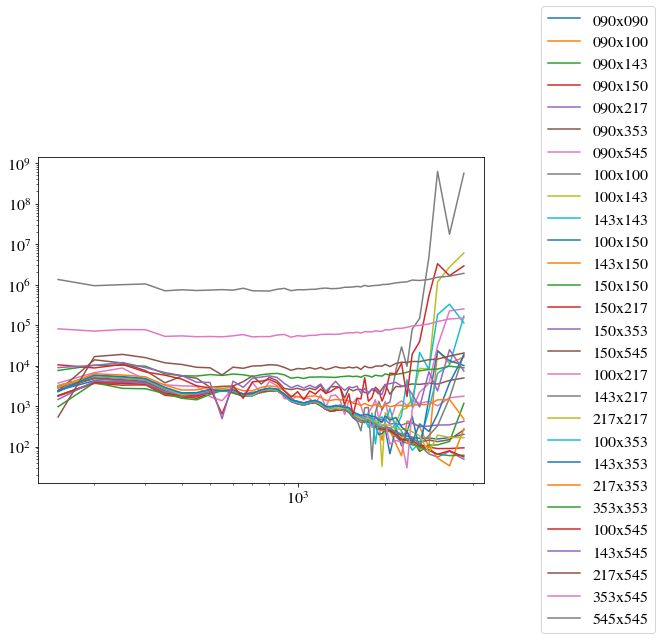

In [84]:
n_bins = 48
j = 0
for i in range(len(sp.spec)):
    if i%n_bins == 0:
        j+=1
        ells = sp.ls[(j-1)*n_bins:j*n_bins]
        fac = ells*(ells+1)/2/np.pi
        plt.plot(sp.ls[(j-1)*n_bins:j*n_bins],fac*np.abs(sp.spec[(j-1)*n_bins:j*n_bins]),label = label_bps[j-1])

plt.loglog()
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5))
plt.savefig('dls_data_d56.pdf')

'090x090'

In [3]:

class StevePower(object):
    def __init__(self,froot,flux,infval=1e10,tt_lmin=600,tt_lmax=None):
        spec=np.loadtxt(f"{froot}coadd_cl_{flux}_data_200124.txt")
        cov =np.loadtxt(f'{froot}coadd_cov_{flux}_200519.txt')
        self.bbl =np.loadtxt(f'{froot}coadd_bpwf_{flux}_191127_lmin2.txt').reshape((10,52,7924))
        self.spec = spec[:520]
        self.cov = cov[:520,:520]
        nbin = 52
        self.ells = np.arange(2,7924+2)
        rells = np.repeat(self.ells[None],10,axis=0)
        print(np.shape(rells))
        self.ls = self.bin(rells)

        if tt_lmin is not None:
            n = 3
            ids = []
            ids = np.argwhere(self.ls<tt_lmin)[:,0]
            ids = ids[ids<nbin*3]
            self.cov[:,ids] = 0
            self.cov[ids,:] = 0
            self.cov[ids,ids] = infval

        if tt_lmax is not None:
            n = 3
            ids = []
            ids = np.argwhere(self.ls>tt_lmax)[:,0]
            ids = ids[ids<nbin*3]
            self.cov[:,ids] = 0
            self.cov[ids,:] = 0
            self.cov[ids,ids] = infval

        self.cinv = np.linalg.inv(self.cov)

    def bin(self,dls):
        bdl = np.einsum('...k,...k',self.bbl,dls[:,None,:])
        return bdl.reshape(-1)

In [4]:
sp = StevePower(dfroot,flux)

(10, 7924)


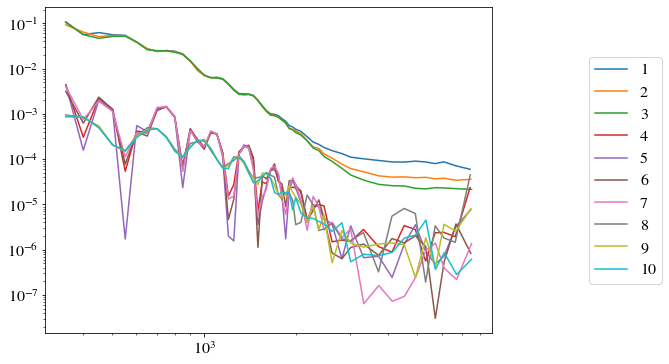

In [5]:
n_bins = 52
j = 0
for i in range(len(sp.spec)):
    if i%n_bins == 0:
        j+=1
        plt.plot(sp.ls[(j-1)*n_bins:j*n_bins],np.abs(sp.spec[(j-1)*n_bins:j*n_bins]),label=j)

plt.loglog()
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5))

In [6]:
j = 1
sp.ls[(j-1)*n_bins:j*n_bins]

array([ 352.13717231,  402.03924091,  451.80342996,  501.63580093,
        551.48916579,  601.40248106,  651.33161168,  701.28479205,
        751.2097379 ,  801.13890916,  851.08938317,  901.05975626,
        951.0355847 , 1001.01677821, 1050.9771505 , 1100.94853464,
       1150.93063896, 1200.9079012 , 1250.88714495, 1300.86973299,
       1350.84443922, 1400.82706341, 1450.81334162, 1500.79415339,
       1550.78094486, 1600.76727898, 1650.75289401, 1700.73552337,
       1750.71366411, 1800.69046041, 1850.67111421, 1900.58438661,
       1950.79430804, 1995.55043732, 2074.22736827, 2176.33327974,
       2276.14354405, 2376.1274455 , 2470.34970664, 2625.69991827,
       2827.37054869, 3020.35766123, 3327.3734583 , 3727.08599723,
       4124.85035528, 4522.17417981, 4920.03050097, 5317.37147603,
       5715.7760704 , 6104.77651597, 6651.87521866, 7438.03650353])

In [27]:
data_root = path_to_data + '/act_planck_data_210328/'
specs = ['f090xf090','f090xf100','f090xf143','f090xf150',
 'f090xf217','f090xf353','f090xf545','f100xf100',
 'f100xf143','f143xf143','f100xf150','f143xf150',
 'f150xf150','f150xf217','f150xf353','f150xf545',
 'f100xf217','f143xf217','f217xf217','f100xf353',
 'f143xf353','f217xf353','f353xf353','f100xf545',
 'f143xf545','f217xf545','f353xf545','f545xf545']
class StevePower_extended(object):
    def __init__(self,flux,infval=1e10,tt_lmin=600,tt_lmax=None):
        if flux == '15mJy':
            froot = 'deep56'
        if flux == '100mJy':
            froot = 'boss'
        
        spec = np.load(data_root+f'{froot}_all_ps_mean_C_ell_data_210327.npy')
        cov = np.load(data_root+f'{froot}_all_ps_Cov_from_coadd_ps_210327.npy')
        bbl = np.load(data_root+f'{froot}_bpwf_210327.npy')
        
        n_specs = len(specs)
        print('n_specs: ',n_specs)
        n_bins = int(len(spec)/n_specs)
        print('n_bins: ',n_bins)
        n_ells = np.shape(bbl)[1]
        
        self.bbl = bbl.reshape((n_specs,n_bins,n_ells))
        self.spec = spec[:,1]
        self.cov = cov
        print('shape cov : ', np.shape(self.cov))
        nbin = n_bins
        #self.ells = np.arange(2,n_ells+2)
        self.ells = spec[:,0]
        #rells = np.repeat(self.ells[None],n_specs,axis=0)
        #print(np.shape(rells))
        #self.ls = self.bin(rells)
        self.ls = spec[:,0]
        
        # conversion factor to bplike normalisations, i.e., dl's to cl's:
        fac = self.ls*(self.ls+1.)/2./np.pi
        self.spec = self.spec/fac
        print('shape spec : ', np.shape(self.spec))
        print('shape fac : ', np.shape(fac))
        self.cov = self.cov/fac**2.
        


        if tt_lmin is not None:
            n = 3
            ids = []
            ids = np.argwhere(self.ls<tt_lmin)[:,0]
            ids = ids[ids<nbin*3]
            self.cov[:,ids] = 0
            self.cov[ids,:] = 0
            self.cov[ids,ids] = infval

        if tt_lmax is not None:
            n = 3
            ids = []
            ids = np.argwhere(self.ls>tt_lmax)[:,0]
            ids = ids[ids<nbin*3]
            self.cov[:,ids] = 0
            self.cov[ids,:] = 0
            self.cov[ids,ids] = infval

        self.cinv = np.linalg.inv(self.cov)

    # not used so far
    def bin(self,dls):
        bdl = np.einsum('...k,...k',self.bbl,dls[:,None,:])
        return bdl.reshape(-1)

In [13]:
spe = StevePower_extended(flux)

n_specs:  28
n_bins:  48
shape cov :  (1344, 1344)
shape spec :  (1344,)
shape fac :  (1344,)


In [14]:
len(spe.spec)

1344

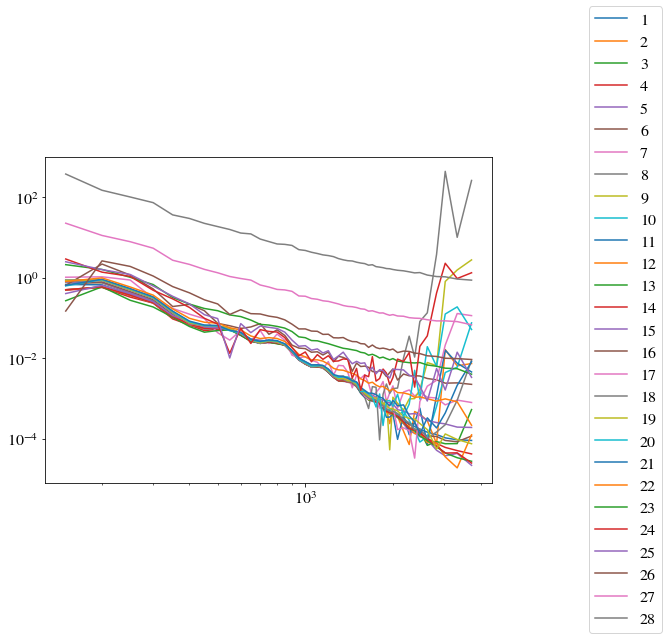

In [15]:
n_bins = 48
j = 0
for i in range(len(spe.spec)):
    if i%n_bins == 0:
        j+=1
        plt.plot(spe.ls[(j-1)*n_bins:j*n_bins],np.abs(spe.spec[(j-1)*n_bins:j*n_bins]),label=j)

plt.loglog()
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5))

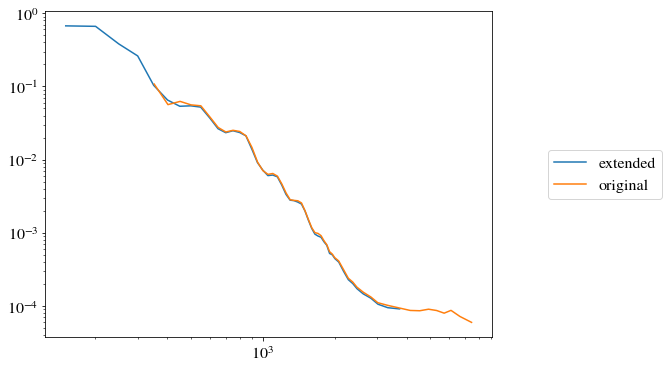

In [16]:
j = 1
n_bins = 48
plt.plot(spe.ls[(j-1)*n_bins:j*n_bins],np.abs(spe.spec[(j-1)*n_bins:j*n_bins]),label='extended')
n_bins = 52
plt.plot(sp.ls[(j-1)*n_bins:j*n_bins],np.abs(sp.spec[(j-1)*n_bins:j*n_bins]),label='original')

plt.loglog()
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5))

In [142]:
j = 1
spe.ls[(j-1)*n_bins:j*n_bins]

array([ 150.5,  200.5,  250.5,  300.5,  350.5,  400.5,  450.5,  500.5,
        550.5,  600.5,  650.5,  700.5,  750.5,  800.5,  850.5,  900.5,
        950.5, 1000.5, 1050.5, 1100.5, 1150.5, 1200.5, 1250.5, 1300.5,
       1350.5, 1400.5, 1450.5, 1500.5, 1550.5, 1600.5, 1650.5, 1700.5,
       1750.5, 1800.5, 1850.5, 1900.5, 1950.5, 2000.5, 2075.5, 2175.5,
       2275.5, 2375.5, 2475.5, 2625.5, 2825.5, 3025.5, 3325.5, 3725.5])

In [97]:



specs = ['f090xf090','f090xf100','f090xf143','f090xf150',
 'f090xf217','f090xf353','f090xf545','f100xf100',
 'f100xf143','f143xf143','f100xf150','f143xf150',
 'f150xf150','f150xf217','f150xf353','f150xf545',
 'f100xf217','f143xf217','f217xf217','f100xf353',
 'f143xf353','f217xf353','f353xf353','f100xf545',
 'f143xf545','f217xf545','f353xf545','f545xf545']

n_specs = len(specs)

In [99]:
AP_spec = np.load(data_root+'deep56_all_ps_mean_C_ell_data_210327.npy')
AP_cov = np.load(data_root+'deep56_all_ps_Cov_from_coadd_ps_210327.npy')
AP_bpwf = np.load(data_root+'deep56_bpwf_210327.npy')

In [107]:
print(np.shape(AP_spec))
print(np.shape(AP_bpwf)[1])
n_bins = int(len(AP_spec)/n_specs)
print(np.shape(AP_cov))
print(n_bins)

(1344, 3)
3926
(1344, 1344)
48


In [102]:
AP_spec_ls = AP_spec[:,0][0:n_bins]
AP_spec_rells = np.repeat(AP_spec_ls[None],nspecs,axis=0)
print(np.shape(AP_spec_rells))

(28, 48)


In [32]:
28*48

1344

0: l's

1: dl's µK^2 

2: err on dl's 

for act: ell>=600.5


In [78]:


AP[:,0][48:96]

array([ 150.5,  200.5,  250.5,  300.5,  350.5,  400.5,  450.5,  500.5,
        550.5,  600.5,  650.5,  700.5,  750.5,  800.5,  850.5,  900.5,
        950.5, 1000.5, 1050.5, 1100.5, 1150.5, 1200.5, 1250.5, 1300.5,
       1350.5, 1400.5, 1450.5, 1500.5, 1550.5, 1600.5, 1650.5, 1700.5,
       1750.5, 1800.5, 1850.5, 1900.5, 1950.5, 2000.5, 2075.5, 2175.5,
       2275.5, 2375.5, 2475.5, 2625.5, 2825.5, 3025.5, 3325.5, 3725.5])

In [56]:
from classy_sz import Class()

SyntaxError: invalid syntax (<ipython-input-56-cbff33c695d5>, line 1)

list of spectra in the files:

In [94]:
specs = ['f090xf090','f090xf100','f090xf143','f090xf150',
 'f090xf217','f090xf353','f090xf545','f100xf100',
 'f100xf143','f143xf143','f100xf150','f143xf150',
 'f150xf150','f150xf217','f150xf353','f150xf545',
 'f100xf217','f143xf217','f217xf217','f100xf353',
 'f143xf353','f217xf353','f353xf353','f100xf545',
 'f143xf545','f217xf545','f353xf545','f545xf545']

In [95]:
n_specs = len(specs)

In [96]:
n_specs


28